In [1]:
import sys
sys.path.append(r'../script/')
from protein_composition import *
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1]:
fig_file='../analysis_result/article_figures'
if not os.path.exists(fig_file):
    os.makedirs(fig_file)

# 各物种蛋白MW比较

In [6]:
protein_amino_acid_composition_Yeast=pd.read_csv('../analysis_result/seq_amino_composition_Yeast_single_cell.csv',index_col=0) 
Yeast_MW=pd.DataFrame(protein_amino_acid_composition_Yeast['MW']).sort_values(by='MW')
protein_amino_acid_composition_MG1655=pd.read_csv('../analysis_result/seq_amino_composition_MG1655.csv',index_col=0)
MG1655_MW=pd.DataFrame(protein_amino_acid_composition_MG1655['MW']).sort_values(by='MW')
protein_amino_acid_composition_Pseudomonas=pd.read_csv('../analysis_result/seq_amino_composition_Pseudomonas.csv',index_col=0) 
Pseudomonas_MW=pd.DataFrame(protein_amino_acid_composition_Pseudomonas['MW']).sort_values(by='MW')
protein_amino_acid_composition_Bacillus=pd.read_csv('../analysis_result/seq_amino_composition_Bacillus.csv',index_col=0) 
Bacillus_MW=pd.DataFrame(protein_amino_acid_composition_Bacillus['MW']).sort_values(by='MW')
protein_amino_acid_composition_Corynebacterium=pd.read_csv('../analysis_result/seq_amino_composition_Corynebacterium_RNA_seq.csv',index_col=0) 
Corynebacterium_MW=pd.DataFrame(protein_amino_acid_composition_Corynebacterium['MW']).sort_values(by='MW')

In [4]:
MW_total=pd.DataFrame()
newindex=0
for index, row in MG1655_MW.iterrows():
    MW_total.loc[newindex,'strain']='E. coli'
    MW_total.loc[newindex,'value']=row['MW']/1000  
    newindex+=1
for index, row in Bacillus_MW.iterrows():
    MW_total.loc[newindex,'strain']='B. subtilis'
    MW_total.loc[newindex,'value']=row['MW']/1000 
    newindex+=1
for index, row in Yeast_MW.iterrows():
    MW_total.loc[newindex,'strain']='S. cerevisiae'
    MW_total.loc[newindex,'value']=row['MW']/1000   
    newindex+=1
for index, row in Pseudomonas_MW.iterrows():
    MW_total.loc[newindex,'strain']='P. aeruginosa'
    MW_total.loc[newindex,'value']=row['MW']/1000  
    newindex+=1
for index, row in Corynebacterium_MW.iterrows():
    MW_total.loc[newindex,'strain']='C. glutamicum'
    MW_total.loc[newindex,'value']=row['MW']/1000
    newindex+=1
    
MW_total.to_csv('../analysis_result/MW_total.csv', sep=',', header=True, index=False) 

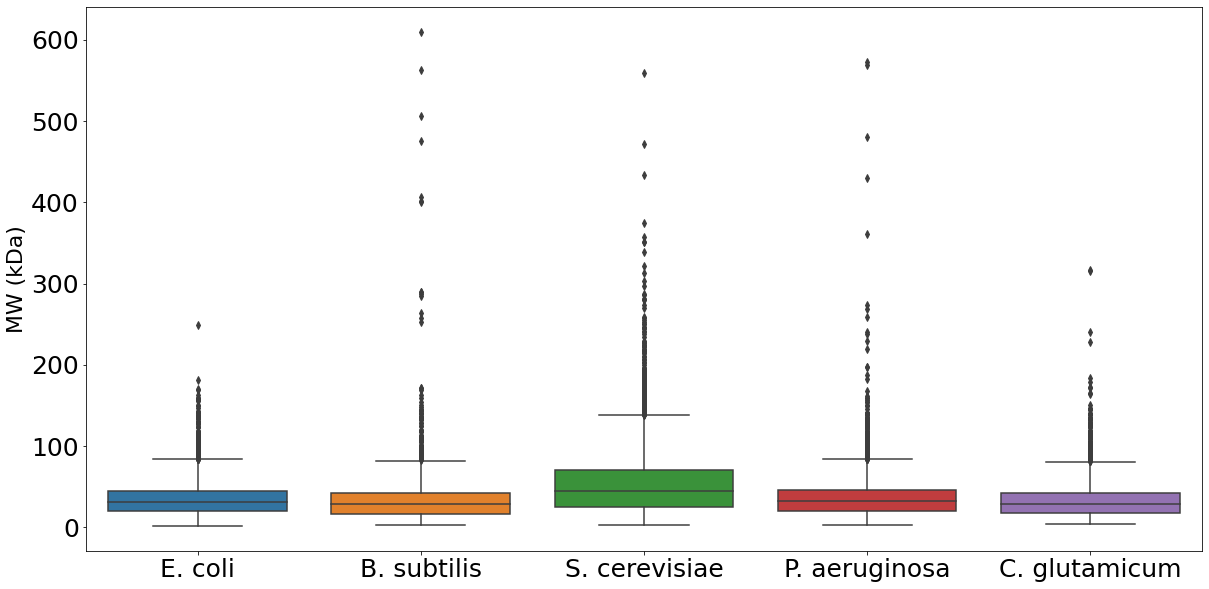

In [5]:
pngname=fig_file+'/protein_MW_boxplot_total.png'

#plt.rcParams['font.style'] ='italic' 
plt.figure(figsize=(20, 10)) 
plt.tick_params(labelsize=25)
sns.boxplot(x='strain', y='value',data=MW_total)
plt.ylabel("MW (kDa)",fontsize=22)
plt.xlabel("", fontsize=22)

#plt.yticks((100,200,300,400,500,600), ('10e4','20e4','30e4','40e4','50e4','60e4'))
plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.show()
#plt.rcParams['font.style'] ='normal'

In [6]:
strain_list=['E. coli','B. subtilis','S. cerevisiae','P. aeruginosa','C. glutamicum']
mw_stat_std=pd.DataFrame()
for each_i in strain_list:
    data= MW_total[MW_total['strain']==each_i]['value']
    mw_stat_std.loc[each_i,'mean']=np.mean(data)
    mw_stat_std.loc[each_i,'sd']=np.std(data)
    mw_stat_std.loc[each_i,'sd/meand']=np.std(data)/np.mean(data)
    
mw_stat_std

,mean,sd,sd/meand
E. coli,35.541268,22.808403,0.641744
B. subtilis,32.981638,29.696616,0.900398
S. cerevisiae,54.551050,41.838207,0.766955
P. aeruginosa,36.855486,27.219594,0.738549
C. glutamicum,33.717116,23.846724,0.707259


# BW25113蛋白组

## 蛋白数目

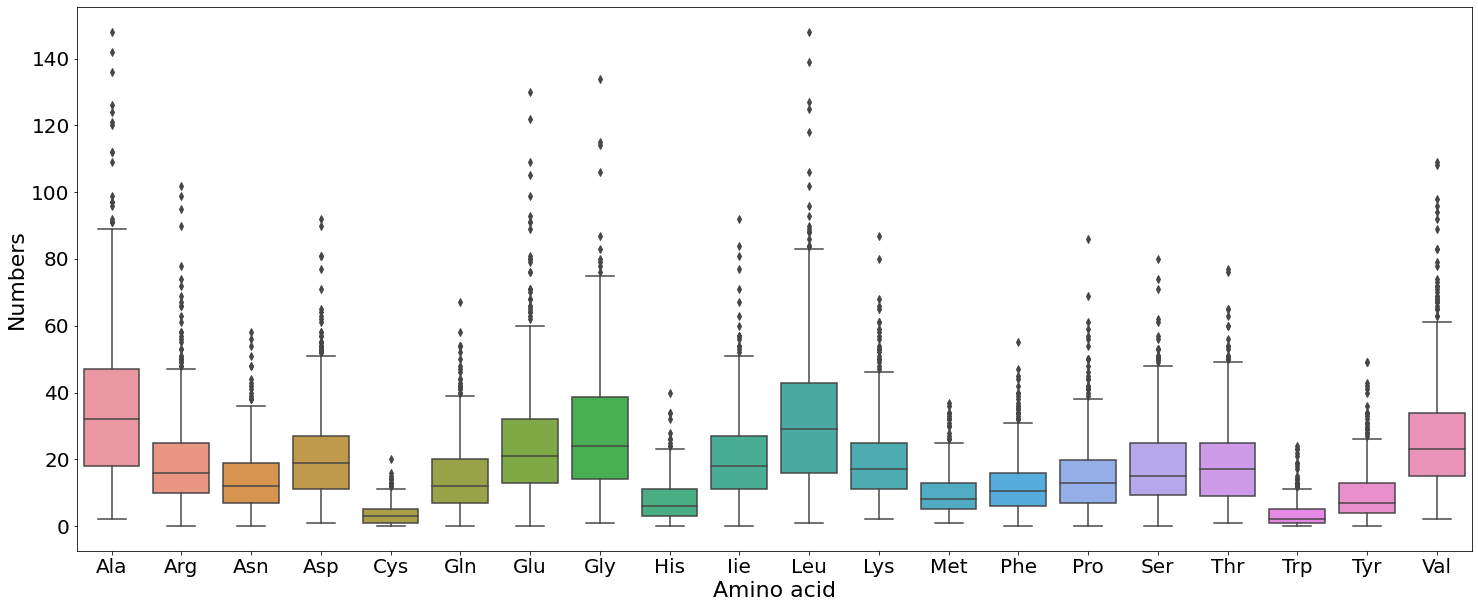

In [99]:
strain='BW25113_pro'
protein_amino_acid_composition=pd.read_csv('../analysis_result/seq_amino_composition_%s.csv'%strain,index_col=0) 
protein_amino_acid_composition=protein_amino_acid_composition.iloc[:,2:24]
protein_amino_acid_composition=protein_amino_acid_composition.sort_index(axis = 1,ascending = True)

pngname='../analysis_result/article_figures/protein_amino_acid_composition_boxplot_%s.png'%strain

plt.figure(figsize=(25, 10)) 
plt.tick_params(labelsize=20)
sns.boxplot(data=protein_amino_acid_composition)
plt.ylabel("Numbers",fontsize=22)
plt.xlabel("Amino acid", fontsize=22)
plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.show()

In [100]:
amino_list=protein_amino_acid_composition.columns.values.tolist()
amino_num_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=protein_amino_acid_composition[each_i]
    amino_num_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_num_stat_std.loc[each_i,'sd']=np.std(data)
    amino_num_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_num_stat_std

,mean,sd,sd/mean
Ala,35.589347,23.359099,0.656351
Arg,19.589347,14.585031,0.744539
Asn,14.039519,9.708473,0.691510
Asp,21.445017,14.555247,0.678724
Cys,3.317869,3.147080,0.948524
Gln,14.582474,10.589460,0.726177
Glu,25.304124,18.354338,0.725350
Gly,27.867698,18.460826,0.662445
His,7.671821,6.143798,0.800826
Iie,20.505155,13.561207,0.661356


## 各蛋白氨基酸质量比

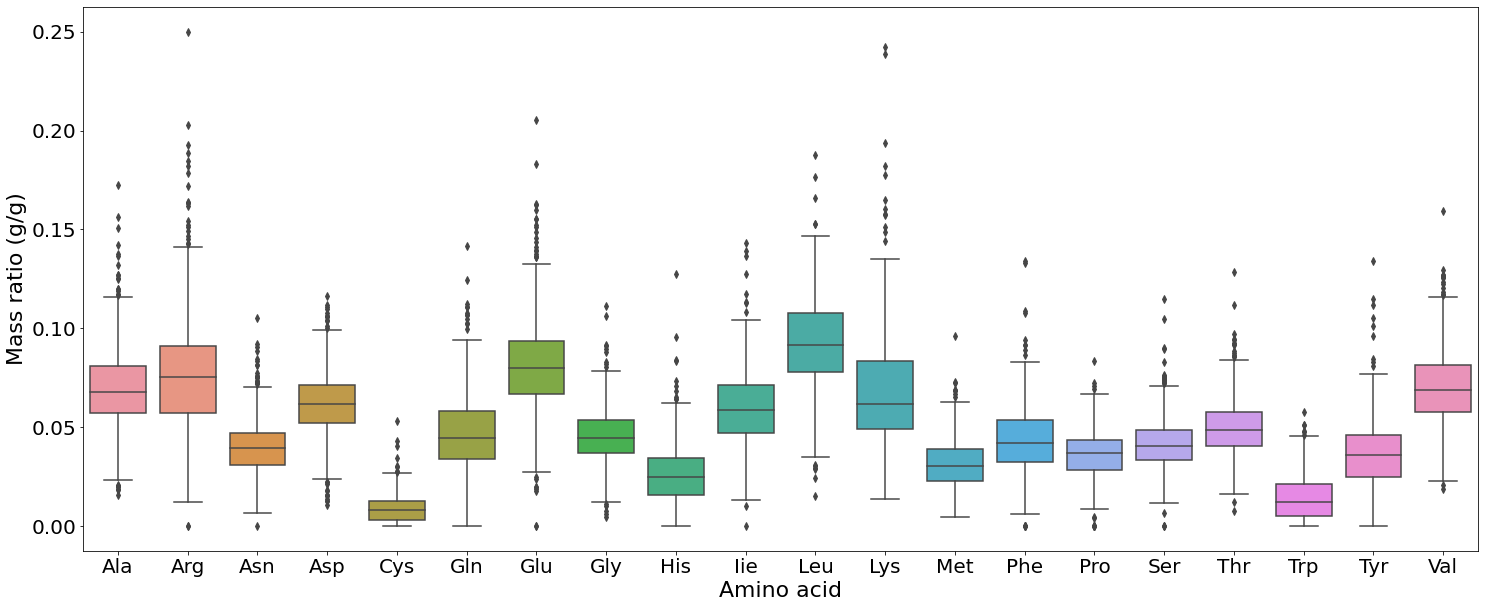

In [101]:
strain='BW25113_pro'
ecoprot_seq_amino_composition_g_g_norm=pd.read_csv('../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain) 
ecoprot_seq_amino_composition_g_g_norm=ecoprot_seq_amino_composition_g_g_norm.iloc[:,1:21]
ecoprot_seq_amino_composition_g_g_norm=ecoprot_seq_amino_composition_g_g_norm.sort_index(axis = 1,ascending = True)

pngname='../analysis_result/article_figures/protein_amino_acid_composition_g_g_boxplot_%s.png'%strain
plt.figure(figsize=(25, 10)) 
plt.tick_params(labelsize=20)
sns.boxplot(data=ecoprot_seq_amino_composition_g_g_norm)
plt.ylabel("Mass ratio (g/g)",fontsize=22)
plt.xlabel("Amino acid", fontsize=22)
plt.savefig(pngname,dpi =300,bbox_inches='tight')

plt.show()

In [102]:
amino_list=ecoprot_seq_amino_composition_g_g_norm.columns.values.tolist()
amino_mass_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=ecoprot_seq_amino_composition_g_g_norm[each_i]
    amino_mass_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_stat_std

,mean,sd,sd/mean
Ala,0.069728,0.020785,0.298091
Arg,0.076137,0.030816,0.404738
Asn,0.040266,0.014053,0.349008
Asp,0.061482,0.016898,0.274838
Cys,0.008679,0.007156,0.824496
Gln,0.046648,0.019083,0.409096
Glu,0.081215,0.025018,0.308049
Gly,0.045530,0.013983,0.307117
His,0.026181,0.015328,0.585476
Iie,0.059796,0.018639,0.311703


## 总氨基酸的质量比

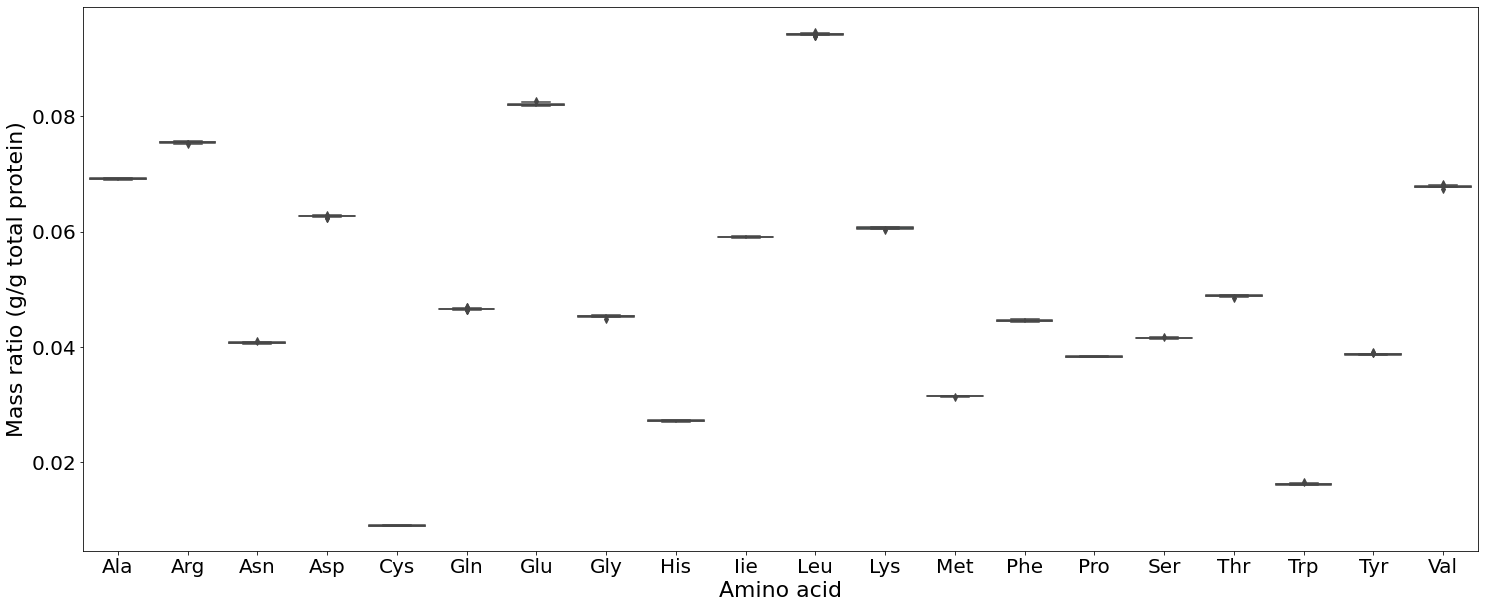

In [103]:
strain='BW25113_pro'
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot.png'%(strain)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [104]:
np.sum(np.mean(amino_composition_norm_onecell_df))

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.9999997599999996

In [105]:
print(strain)
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
amino_list=amino_composition_norm_onecell_df.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

BW25113_pro


,mean,sd,sd/mean
Ala,0.069156,0.000133,0.001918
Arg,0.075494,0.000115,0.001518
Asn,0.040787,0.000100,0.002453
Asp,0.062733,0.000117,0.001869
Cys,0.009061,0.000048,0.005260
Gln,0.046610,0.000126,0.002704
Glu,0.082060,0.000202,0.002459
Gly,0.045348,0.000128,0.002817
His,0.027181,0.000125,0.004581
Iie,0.059074,0.000100,0.001698


## 质量总和超过50%的蛋白质量分布情况

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5023822083333334


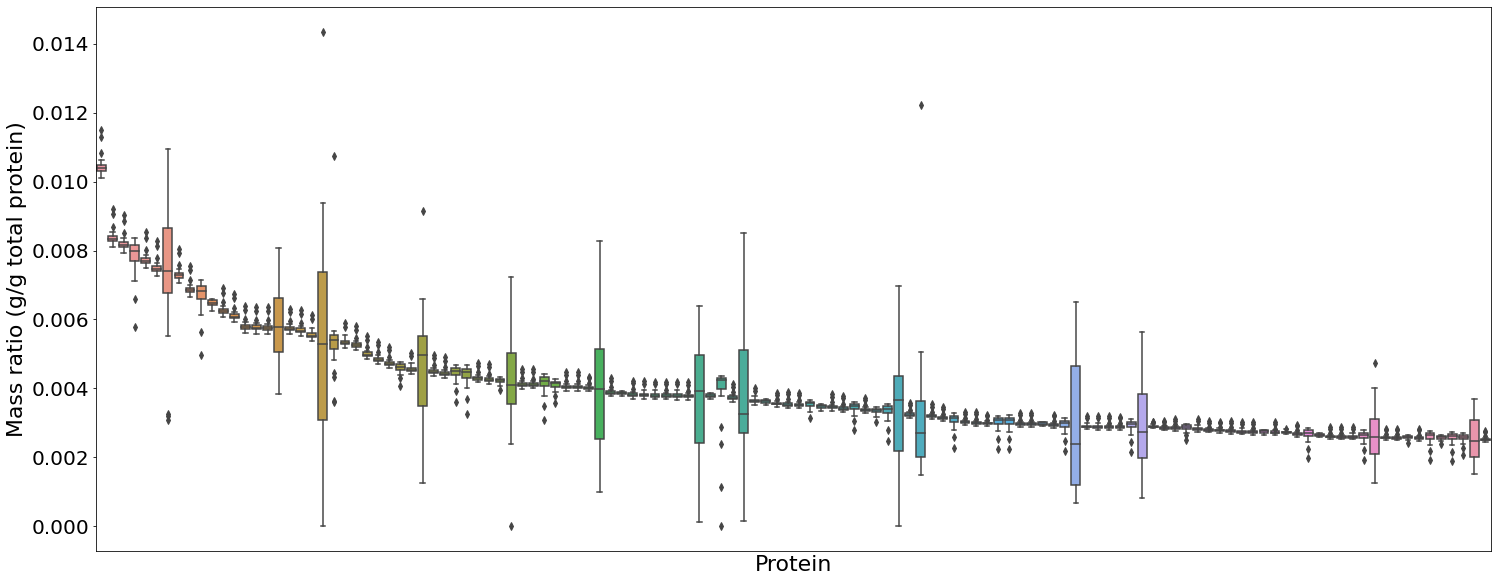

In [106]:
strain='BW25113_pro'
protein_expression_mass_norm_outfile='../analysis_result/%s_exp_onecell.json'%strain
protein_expression_mass_norm=json_load(protein_expression_mass_norm_outfile) 
protein_expression_mass_norm_df=pd.DataFrame(protein_expression_mass_norm).T
protein_expression_mass_norm_df=protein_expression_mass_norm_df.drop(['b3916(KO)'])
                                       
topnum=126
top_filename='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.csv'
pngname='../analysis_result/article_figures/protein_top%s_exp%s.png'%(topnum,strain)
use_prot=top_protein_mass_ratio(protein_expression_mass_norm_df,topnum,top_filename,pngname)

In [107]:
topnum/protein_expression_mass_norm_df.shape[1]

0.21649484536082475

### 蛋白质量分布标准差

In [108]:
protein_list=use_prot.columns.values.tolist()
protein_mass_norm_stat_std=pd.DataFrame()
            
for each_i in protein_list:
    data=use_prot[each_i]
    protein_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    protein_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    protein_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
protein_mass_norm_stat_std.head(5)

,mean,sd,sd/mean
b4019,0.010475,0.000319,0.030433
b1084,0.008403,0.000254,0.030200
b2903,0.008233,0.000251,0.030443
b3212,0.007810,0.000583,0.074609
b0033,0.007762,0.000237,0.030487


## 质量总和超过50%的蛋白的氨基酸总质量

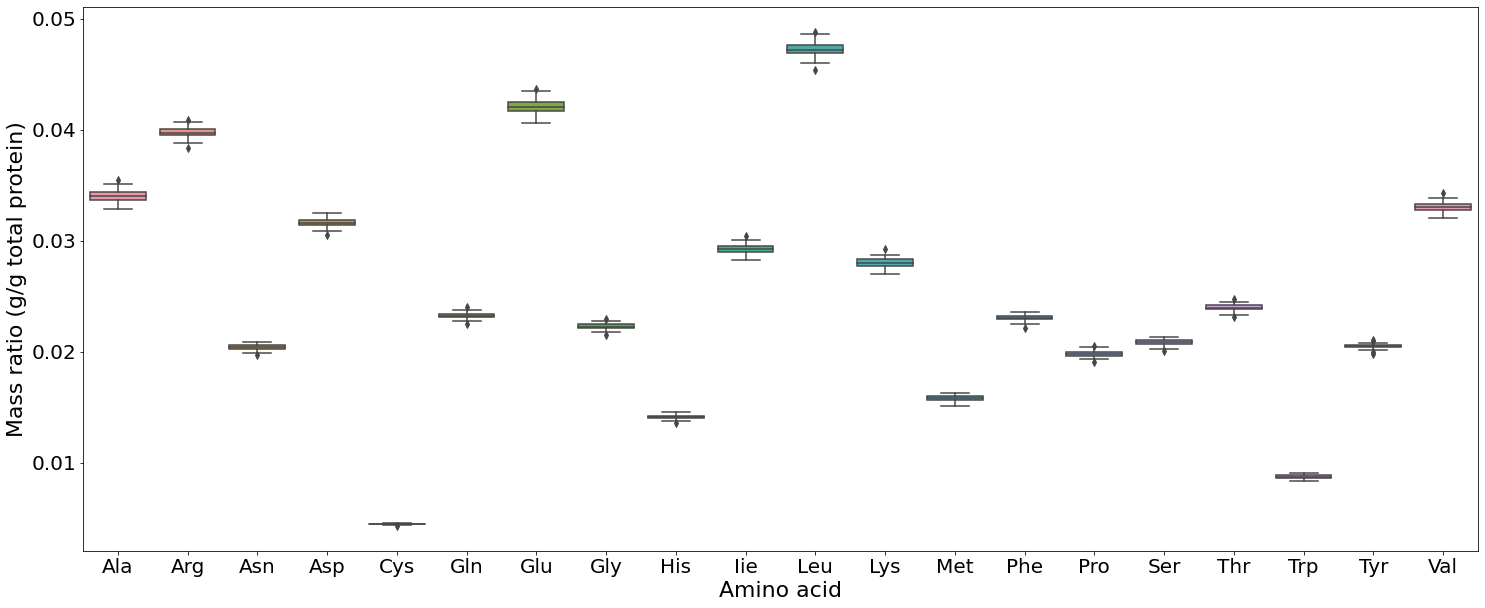

In [109]:
protein_expression_mass_norm_json=use_prot.T.to_json()
top_filename_json='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.json'
with open(top_filename_json, "w", encoding="utf-8") as f:
    f.write(protein_expression_mass_norm_json)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain
amino_composition_norm_onecell_outfile='../analysis_result/amino_composition_g_g_norm_onecell_%s_top%sprotein.json'%(strain,topnum)
amino_acid_expression_mass_norm_json=amino_acid_expression_mass_norm(top_filename_json,seq_amino_composition_MW_norm_file,amino_composition_norm_onecell_outfile)


# draw figure
amino_composition_norm_onecell=json_load(amino_composition_norm_onecell_outfile)
amino_composition_norm_onecell_df=pd.DataFrame()
for key, value in amino_composition_norm_onecell.items():
    for key2 in value.keys():
        amino_composition_norm_onecell_df.loc[key,key2]=value[key2]['total']
        
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_top%sprotein_%s.csv'%(topnum,strain)
amino_composition_norm_onecell_df.to_csv(amino_composition_norm_onecell_df_outfile, header=True, index=True) 

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot_top%s_protein.png'%(strain,topnum)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [110]:
np.sum(np.mean(amino_composition_norm_onecell_df))

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5023820416666667

### 氨基酸质量标准差

In [111]:
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_list=amino_composition_norm_onecell_df.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

,mean,sd,sd/mean
Ala,0.034037,0.000579,0.017004
Arg,0.039689,0.000527,0.013285
Asn,0.020438,0.000293,0.014353
Asp,0.031588,0.000432,0.013678
Cys,0.004506,0.000071,0.015767
Gln,0.023267,0.000320,0.013769
Glu,0.042097,0.000702,0.016687
Gly,0.022276,0.000319,0.014312
His,0.014137,0.000213,0.015084
Iie,0.029275,0.000478,0.016314


### two independent-sample t-test：医学研究中常用于完全随机设计两样本均数的比较，即将受试对象完全随机分配到两个不同处理组，研究者关心的是两样本均数所代表的两总体均数是否不等。

In [112]:
mw_stat=pd.DataFrame()

data1=protein_mass_norm_stat_std['sd/mean']
data2=amino_mass_norm_stat_std['sd/mean']
mw_stat.loc['exp2amino','mean_in_exp']=np.mean(data1)
mw_stat.loc['exp2amino','mean_in_AA']=np.mean(data2)

if stats.levene(data1,data2).pvalue>0.5:#如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。
    print('Standard independent 2 sample test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2).pvalue#独立样本T检验
else:
    print('Welch’s t-test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2,equal_var=False).pvalue
mw_stat=mw_stat.sort_values(by='p_value',ascending = False)
mw_stat

Welch’s t-test


,mean_in_exp,mean_in_AA,p_value
exp2amino,0.08315,0.015213,2.353911e-07


## 质量总和超过50%的蛋白种表达变化比较大的蛋白

In [113]:
protein_expression_mass_norm_outfile='../analysis_result/%s_exp_onecell.json'%strain
protein_expression_mass_norm=json_load(protein_expression_mass_norm_outfile) 
protein_expression_mass_norm_df=pd.DataFrame(protein_expression_mass_norm).T

#变化范围大的蛋白
# diff_max_min=np.max(protein_expression_mass_norm_df,axis = 0)-np.min(protein_expression_mass_norm_df,axis = 0)
# diff_max_min_sort=diff_max_min.sort_values(ascending = False)
diff_max_min_norm=(np.max(protein_expression_mass_norm_df,axis = 0)-np.min(protein_expression_mass_norm_df,axis = 0))/np.max(protein_expression_mass_norm_df,axis = 0)
diff_max_min_sort=diff_max_min_norm.sort_values(ascending = False)

max_gene_list=list(use_prot.columns)
#diff_max_min_list=list(diff_max_min_sort[0:topnum].index)
diff_max_min_list=list(diff_max_min_sort[diff_max_min_sort>0.3].index)
intersection_list=list(set(max_gene_list).intersection(set(diff_max_min_list)))
print(len(intersection_list))
len(intersection_list)/protein_expression_mass_norm_df.shape[1]

104


0.17869415807560138

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.42842756


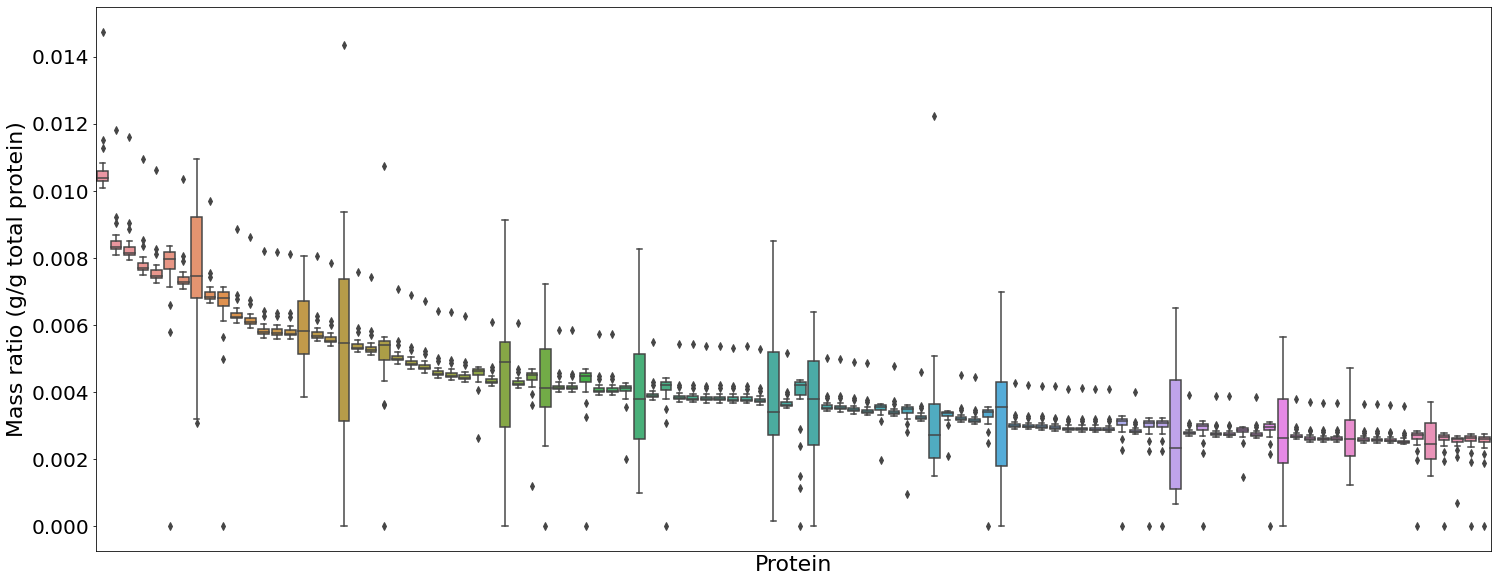

In [114]:
topnum=len(intersection_list)
top_filename='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.csv'
pngname='../analysis_result/article_figures/protein_top%s_exp%s.png'%(topnum,strain)
diff_max_min_prot=protein_expression_mass_norm_df.loc[:,intersection_list]
use_prot_diff=top_protein_mass_ratio(diff_max_min_prot,topnum,top_filename,pngname)

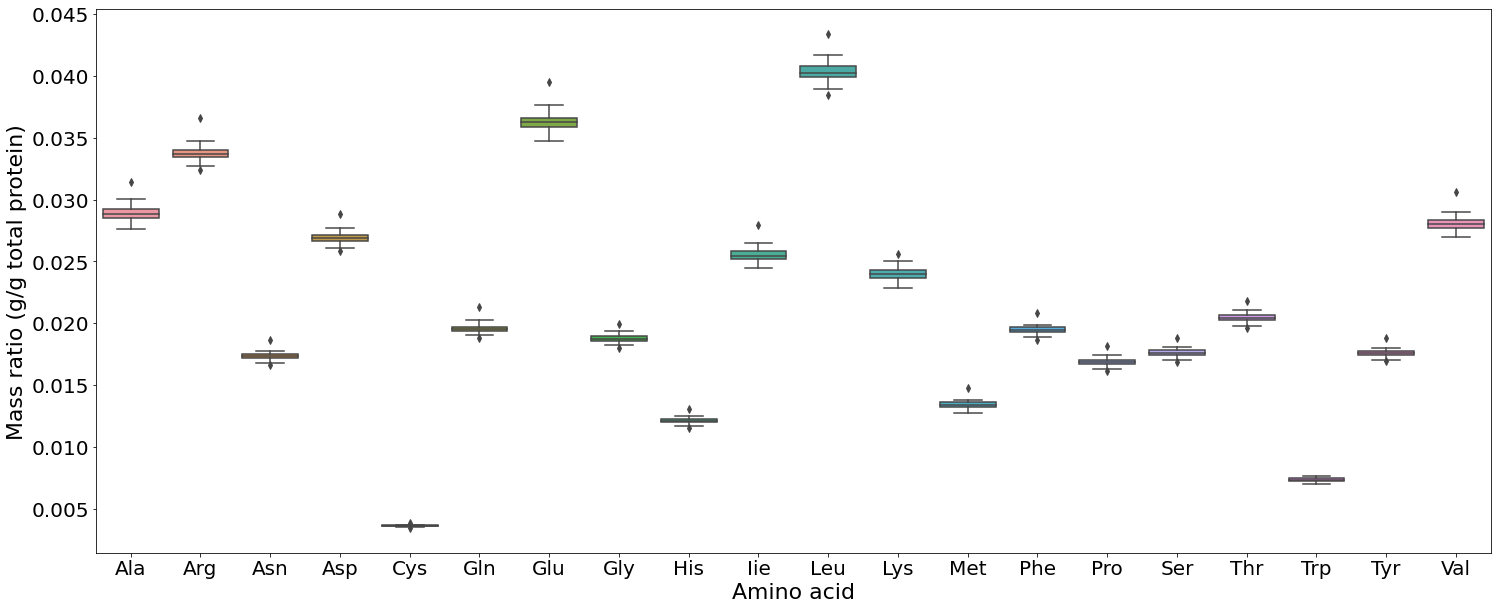

In [115]:
diff_max_min_prot=protein_expression_mass_norm_df.loc[:,intersection_list]
protein_expression_mass_norm_json=diff_max_min_prot.T.to_json()
top_filename_json='../analysis_result/'+strain+'_intersection'+'_expdata.json'
with open(top_filename_json, "w", encoding="utf-8") as f:
    f.write(protein_expression_mass_norm_json)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain
amino_composition_norm_onecell_outfile='../analysis_result/amino_composition_g_g_norm_onecell_%s_intersection_protein.json'%(strain)
amino_acid_expression_mass_norm_json=amino_acid_expression_mass_norm(top_filename_json,seq_amino_composition_MW_norm_file,amino_composition_norm_onecell_outfile)

# draw figure
amino_composition_norm_onecell=json_load(amino_composition_norm_onecell_outfile)
amino_composition_norm_onecell_df=pd.DataFrame()
for key, value in amino_composition_norm_onecell.items():
    for key2 in value.keys():
        amino_composition_norm_onecell_df.loc[key,key2]=value[key2]['total']
        
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_intersection_protein_%s.csv'%strain
amino_composition_norm_onecell_df.to_csv(amino_composition_norm_onecell_df_outfile, header=True, index=True) 

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot_intersection_protein.png'%(strain)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [116]:
np.sum(np.mean(amino_composition_norm_onecell_df))

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.42842832000000003

In [117]:
protein_list=diff_max_min_prot.columns.values.tolist()
protein_mass_norm_stat_std=pd.DataFrame()
            
for each_i in protein_list:
    data=diff_max_min_prot[each_i]
    protein_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    protein_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    protein_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
protein_mass_norm_stat_std.head(5)

,mean,sd,sd/mean
b3940,0.003600,0.000299,0.083107
b0484,0.005900,0.000495,0.083936
b3212,0.007497,0.001633,0.217865
b3994,0.004350,0.000369,0.084887
b2329,0.002662,0.000225,0.084561


In [118]:
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
amino_list=amino_composition_norm_onecell_df.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
          
for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

,mean,sd,sd/mean
Ala,0.028898,0.000758,0.026230
Arg,0.033787,0.000768,0.022743
Asn,0.017392,0.000390,0.022401
Asp,0.026965,0.000571,0.021168
Cys,0.003628,0.000084,0.023238
Gln,0.019604,0.000475,0.024253
Glu,0.036340,0.000938,0.025800
Gly,0.018790,0.000386,0.020522
His,0.012123,0.000280,0.023131
Iie,0.025547,0.000679,0.026560


In [119]:
mw_stat=pd.DataFrame()

data1=protein_mass_norm_stat_std['sd/mean']
data2=amino_mass_norm_stat_std['sd/mean']
mw_stat.loc['exp2amino','mean_in_exp']=np.mean(data1)
mw_stat.loc['exp2amino','mean_in_AA']=np.mean(data2)

if stats.levene(data1,data2).pvalue>0.5:#如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。
    print('Standard independent 2 sample test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2).pvalue#独立样本T检验
else:
    print('Welch’s t-test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2,equal_var=False).pvalue
mw_stat=mw_stat.sort_values(by='p_value',ascending = False)
mw_stat

Welch’s t-test


,mean_in_exp,mean_in_AA,p_value
exp2amino,0.158593,0.023288,1.017598e-16


## 相关性分析

In [28]:
strain='BW25113_pro'
topnum=126

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain
ori_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
ori_pro=ori_pro.sort_index(axis = 1,ascending = True)
ori_pro_mean=np.mean(ori_pro)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_top%sprotein_%s.csv'%(topnum,strain)
top_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
top_pro=top_pro.sort_index(axis = 1,ascending = True)
top_pro_mean=np.mean(top_pro) 

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_intersection_protein_%s.csv'%strain
exp_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
exp_pro=exp_pro.sort_index(axis = 1,ascending = True)
exp_pro_mean=np.mean(exp_pro)


pro_mean=pd.concat([ori_pro_mean,top_pro_mean,exp_pro_mean],axis=1)
pro_mean.columns=['Total','Mass TOP','Mass and expression']
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)

from scipy import stats
species_list=['Total','Mass TOP','Mass and expression']
mw_stat=pd.DataFrame()
for each_i in range(len(species_list)-1):
    for each_j in range(each_i,len(species_list)):
        if (each_i!=each_j):
            amino_vs=species_list[each_i]+'_'+species_list[each_j]
            mw_stat.loc[amino_vs,'corr']=stats.pearsonr(pro_mean[species_list[each_i]],pro_mean[species_list[each_j]])[0]
mw_stat=mw_stat.sort_values(by='corr',ascending = False)
mw_stat.head()

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  retur

,corr
Mass TOP_Mass and expression,0.999793
Total_Mass TOP,0.996769
Total_Mass and expression,0.996417


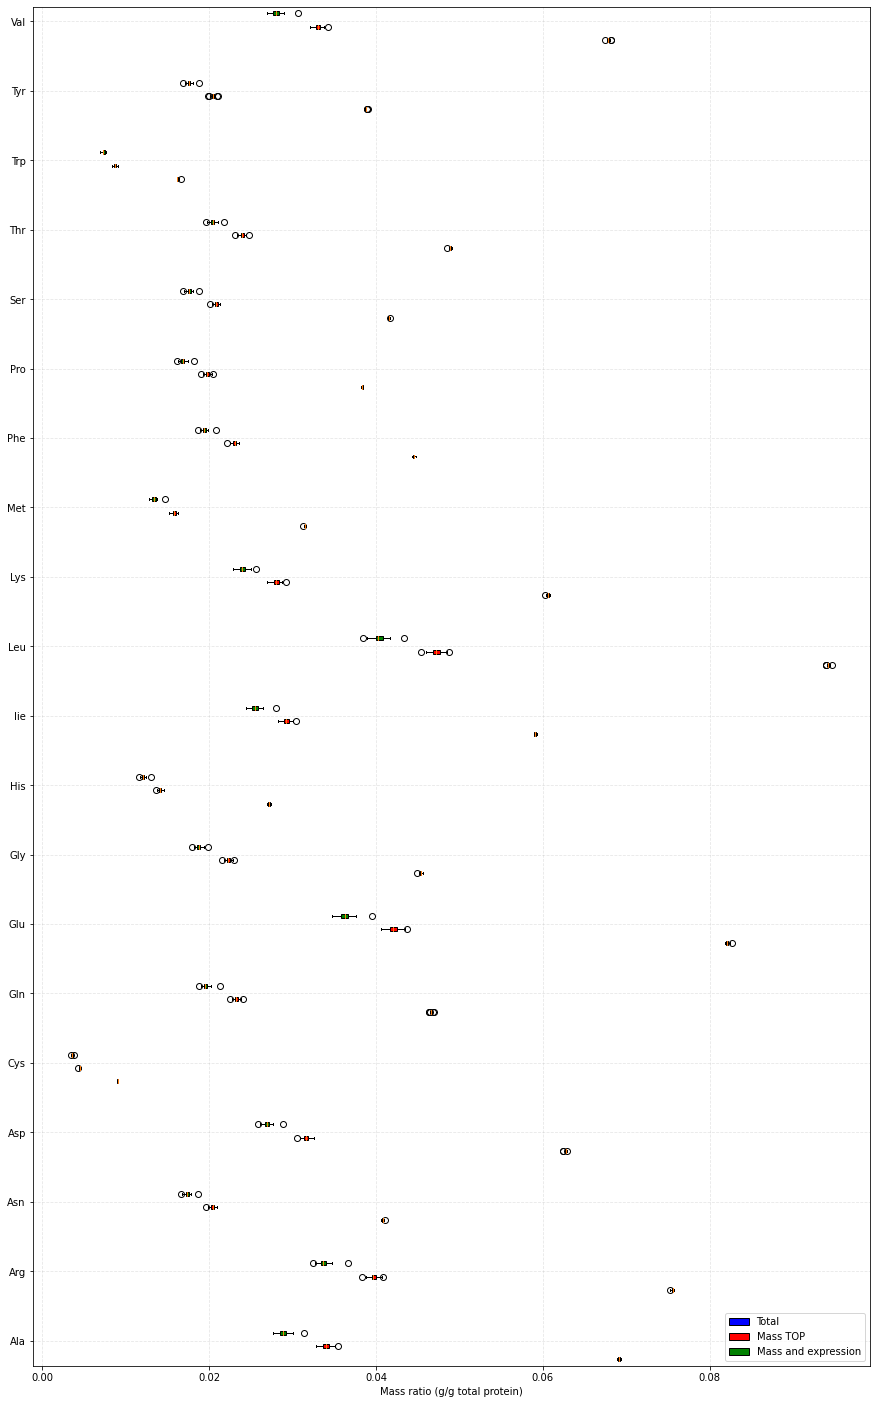

In [29]:
twoamino_use_data={}
for eachamino in list(ori_pro.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(ori_pro[eachamino]))
    twoamino_use_data[eachamino].append(list(top_pro[eachamino]))
    twoamino_use_data[eachamino].append(list(exp_pro[eachamino]))

data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ['Total','Mass TOP','Mass and expression']
colors = ['blue', 'red', 'green']
ori_list=[1,2,3]
fold=3.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list#np.linspace(1,np.max(list(np.add(ori_list,28.5*fold))),20)
x_position_fmt=list(ori_pro.columns)
ylabel='Mass ratio (g/g total protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_topandexp%s.png'%strain
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,25)

# 

# BW25113转录组

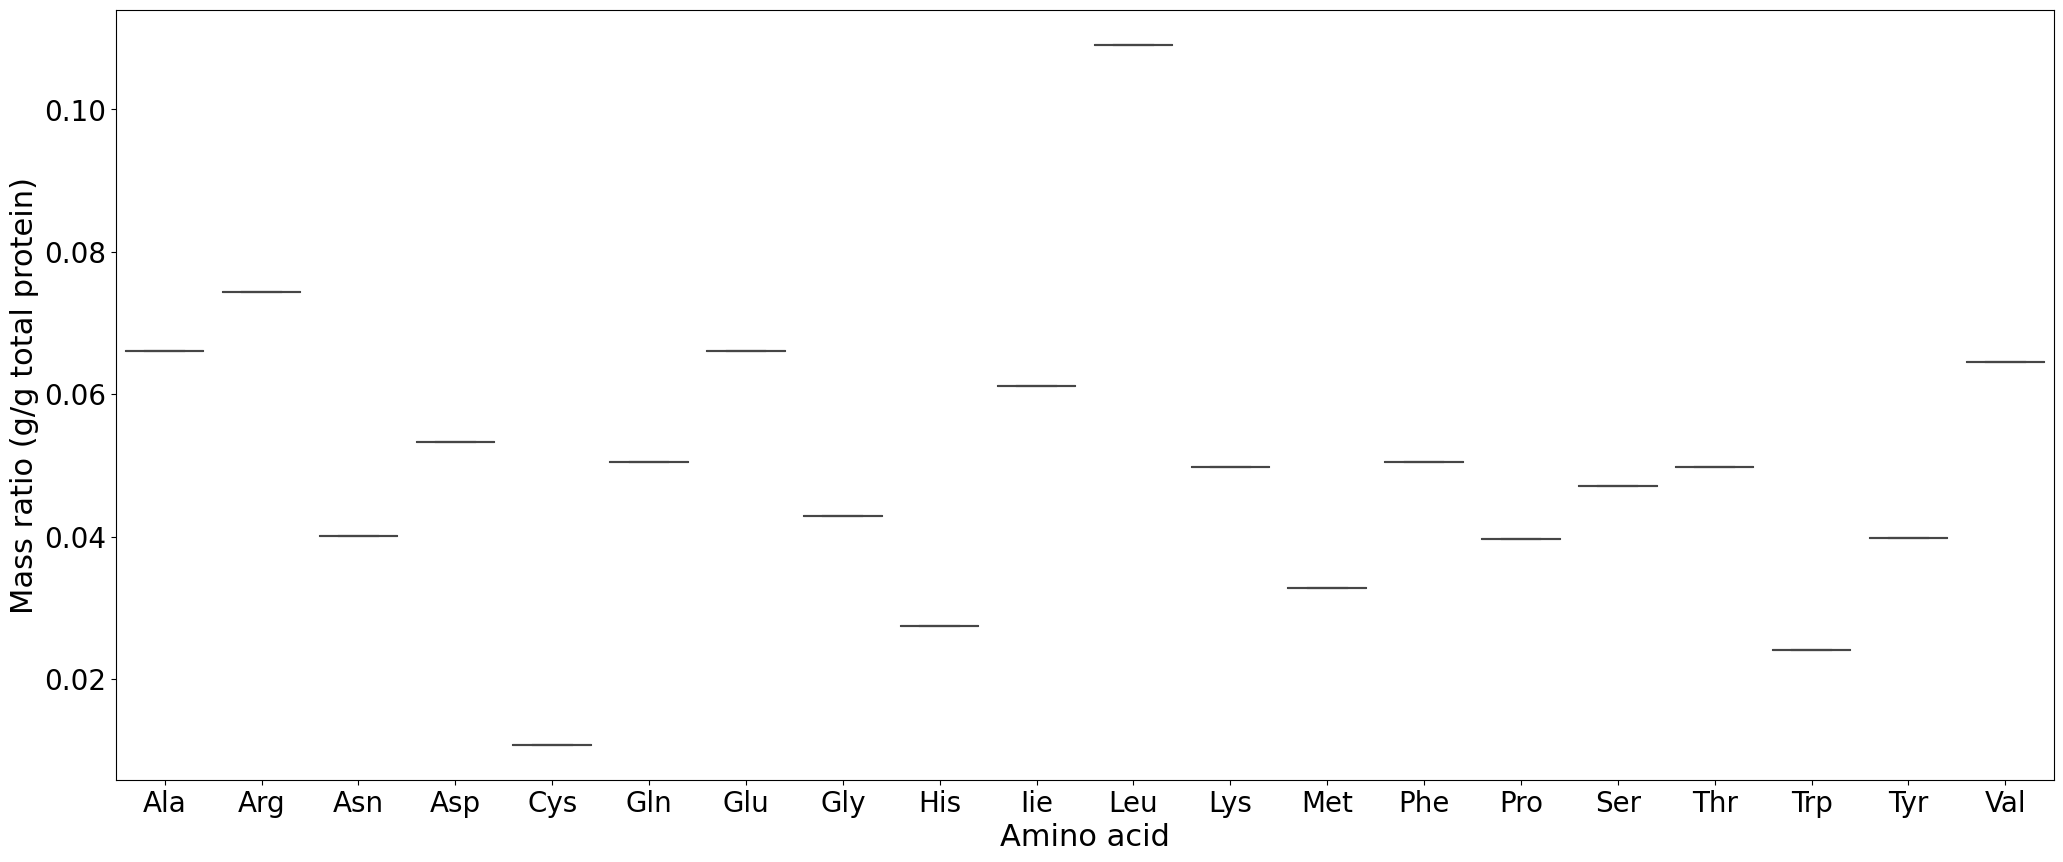

In [7]:
strain='BW25113'
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot.png'%(strain)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [8]:
print(strain)
amino_mass_norm_stat_std=pd.DataFrame()
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
amino_list=amino_composition_norm_onecell_df.columns.values.tolist()    

for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

BW25113


,mean,sd,sd/mean
Ala,0.066029,0.000000e+00,0.000000e+00
Arg,0.074389,1.387779e-17,1.865570e-16
Asn,0.040130,0.000000e+00,0.000000e+00
Asp,0.053300,0.000000e+00,0.000000e+00
Cys,0.010773,1.734723e-18,1.610251e-16
Gln,0.050542,1.387779e-17,2.745793e-16
Glu,0.066053,1.387779e-17,2.101008e-16
Gly,0.042871,6.938894e-18,1.618552e-16
His,0.027509,3.469447e-18,1.261204e-16
Iie,0.061197,1.387779e-17,2.267724e-16


## 质量总和超过50%的蛋白的氨基酸总质量

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5008337959183673


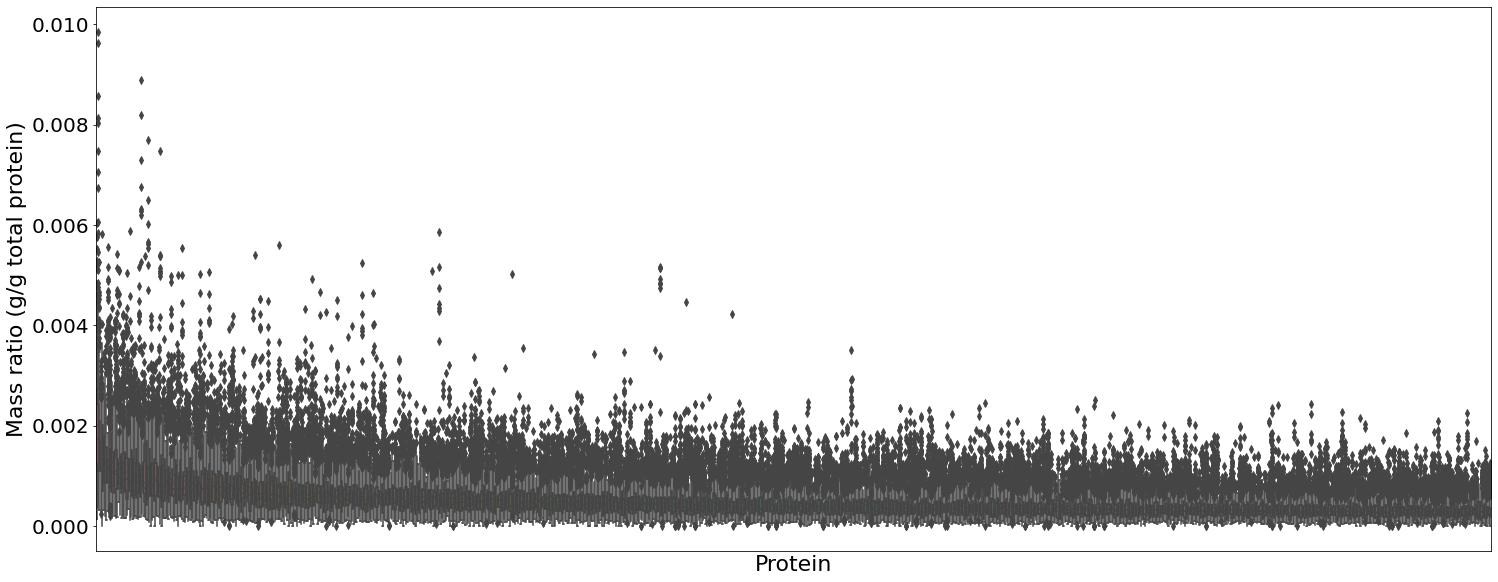

In [122]:
#超过50%的质量的蛋白数目
strain='BW25113'
protein_expression_mass_norm_outfile='../analysis_result/%s_exp_onecell.json'%strain
protein_expression_mass_norm=json_load(protein_expression_mass_norm_outfile) 
protein_expression_mass_norm_df=pd.DataFrame(protein_expression_mass_norm).T
protein_expression_mass_norm_df=protein_expression_mass_norm_df.drop(['BW25113.MD106.none.na_WT_T5490'])
                                       
topnum=1010
top_filename='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.csv'
pngname='../analysis_result/article_figures/protein_top%s_exp%s.png'%(topnum,strain)
use_prot=top_protein_mass_ratio(protein_expression_mass_norm_df,topnum,top_filename,pngname)

In [123]:
topnum/protein_expression_mass_norm_df.shape[1]

0.24754901960784315

In [124]:
protein_list=use_prot.columns.values.tolist()
protein_mass_norm_stat_std=pd.DataFrame()
            
for each_i in protein_list:
    data=use_prot[each_i]
    protein_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    protein_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    protein_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
protein_mass_norm_stat_std.head(5)

,mean,sd,sd/mean
b3988,0.002144,0.001152,0.537202
b3987,0.002009,0.001443,0.718444
b3212,0.001726,0.000851,0.493320
b0890,0.001415,0.000555,0.392216
b1014,0.001396,0.000820,0.587831


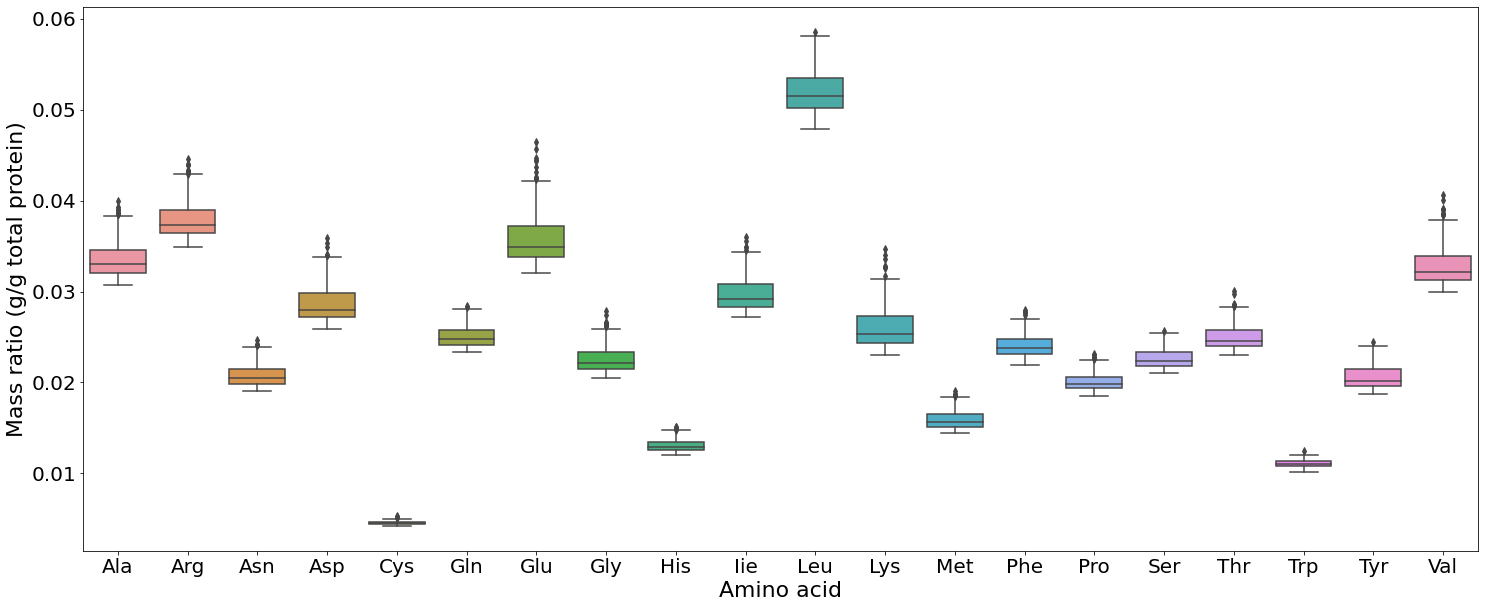

In [125]:
protein_expression_mass_norm_json=use_prot.T.to_json()
top_filename_json='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.json'
with open(top_filename_json, "w", encoding="utf-8") as f:
    f.write(protein_expression_mass_norm_json)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain
amino_composition_norm_onecell_outfile='../analysis_result/amino_composition_g_g_norm_onecell_%s_top%sprotein.json'%(strain,topnum)
amino_acid_expression_mass_norm_json=amino_acid_expression_mass_norm(top_filename_json,seq_amino_composition_MW_norm_file,amino_composition_norm_onecell_outfile)


# draw figure
amino_composition_norm_onecell=json_load(amino_composition_norm_onecell_outfile)
amino_composition_norm_onecell_df=pd.DataFrame()
for key, value in amino_composition_norm_onecell.items():
    for key2 in value.keys():
        amino_composition_norm_onecell_df.loc[key,key2]=value[key2]['total']
        
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_top%sprotein_%s.csv'%(topnum,strain)
amino_composition_norm_onecell_df.to_csv(amino_composition_norm_onecell_df_outfile, header=True, index=True) 

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot_top%s_protein.png'%(strain,topnum)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [126]:
np.sum(np.mean(amino_composition_norm_onecell_df))

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5008355393586006

In [127]:
amino_list=amino_composition_norm_onecell_df.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
            
for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

,mean,sd,sd/mean
Gly,0.022506,0.001369,0.060819
Ala,0.033449,0.001891,0.056527
Val,0.032758,0.002025,0.061811
Leu,0.051931,0.002183,0.042036
Iie,0.029630,0.001744,0.058875
Phe,0.023997,0.001211,0.050462
Trp,0.011104,0.000378,0.034079
Tyr,0.020535,0.001252,0.060961
Asp,0.028639,0.001931,0.067434
Asn,0.020766,0.001158,0.055772


In [128]:
mw_stat=pd.DataFrame()

data1=protein_mass_norm_stat_std['sd/mean']
data2=amino_mass_norm_stat_std['sd/mean']
mw_stat.loc['exp2amino','mean_in_exp']=np.mean(data1)
mw_stat.loc['exp2amino','mean_in_AA']=np.mean(data2)

if stats.levene(data1,data2).pvalue>0.5:#如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。
    print('Standard independent 2 sample test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2).pvalue#独立样本T检验
else:
    print('Welch’s t-test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2,equal_var=False).pvalue
mw_stat=mw_stat.sort_values(by='p_value',ascending = False)
mw_stat

Welch’s t-test


,mean_in_exp,mean_in_AA,p_value
exp2amino,0.564417,0.055054,3.134557e-157


## 质量总和超过50%的蛋白种表达变化比较大的蛋白

In [129]:
protein_expression_mass_norm_outfile='../analysis_result/%s_exp_onecell.json'%strain
protein_expression_mass_norm=json_load(protein_expression_mass_norm_outfile) 
protein_expression_mass_norm_df=pd.DataFrame(protein_expression_mass_norm).T
protein_expression_mass_norm_df=protein_expression_mass_norm_df.drop(['BW25113.MD106.none.na_WT_T5490'])

#变化范围大的蛋白
# diff_max_min=np.max(protein_expression_mass_norm_df,axis = 0)-np.min(protein_expression_mass_norm_df,axis = 0)
# diff_max_min_sort=diff_max_min.sort_values(ascending = False)
diff_max_min_norm=(np.max(protein_expression_mass_norm_df,axis = 0)-np.min(protein_expression_mass_norm_df,axis = 0))/np.max(protein_expression_mass_norm_df,axis = 0)
diff_max_min_sort=diff_max_min_norm.sort_values(ascending = False)

max_gene_list=list(use_prot.columns)
#diff_max_min_list=list(diff_max_min_sort[0:topnum].index)
diff_max_min_list=list(diff_max_min_sort[diff_max_min_sort>0.3].index)

intersection_list=list(set(max_gene_list).intersection(set(diff_max_min_list)))
len(intersection_list)

1010

In [130]:
len(intersection_list)/protein_expression_mass_norm_df.shape[1]

0.24754901960784315

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5008337959183673


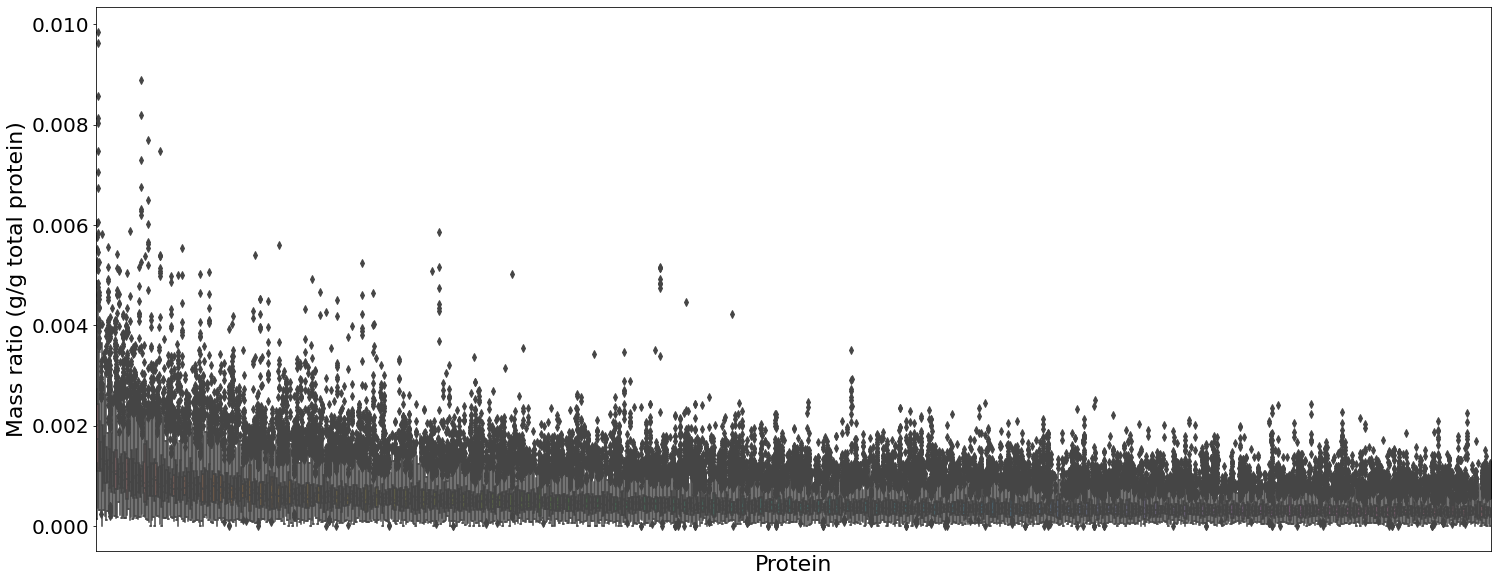

In [131]:
topnum=len(intersection_list)
top_filename='../analysis_result/'+strain+'_'+str(topnum)+'_expdata.csv'
pngname='../analysis_result/article_figures/protein_top%s_exp%s.png'%(topnum,strain)
diff_max_min_prot=protein_expression_mass_norm_df.loc[:,intersection_list]
use_prot_diff=top_protein_mass_ratio(diff_max_min_prot,topnum,top_filename,pngname)

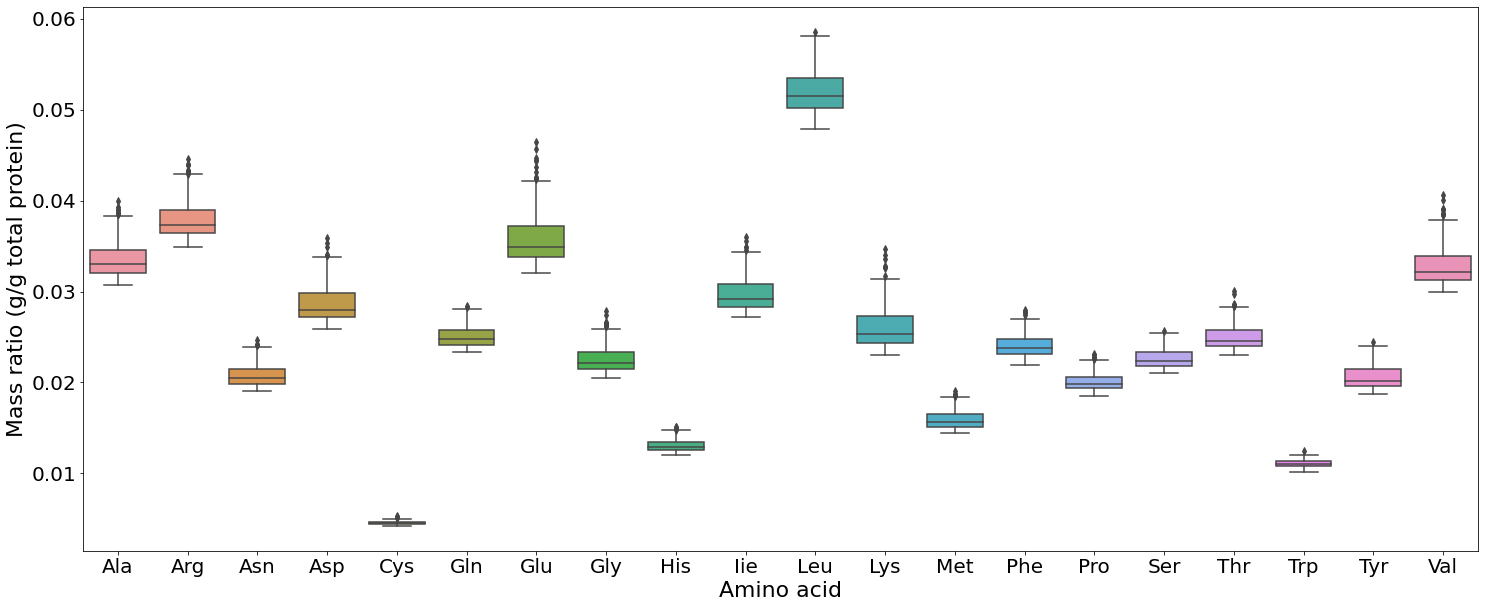

In [132]:
diff_max_min_prot=protein_expression_mass_norm_df.loc[:,intersection_list]
protein_expression_mass_norm_json=diff_max_min_prot.T.to_json()
top_filename_json='../analysis_result/'+strain+'_intersection'+'_expdata.json'
with open(top_filename_json, "w", encoding="utf-8") as f:
    f.write(protein_expression_mass_norm_json)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain
amino_composition_norm_onecell_outfile='../analysis_result/amino_composition_g_g_norm_onecell_%s_intersection_protein.json'%(strain)
amino_acid_expression_mass_norm_json=amino_acid_expression_mass_norm(top_filename_json,seq_amino_composition_MW_norm_file,amino_composition_norm_onecell_outfile)

# draw figure
amino_composition_norm_onecell=json_load(amino_composition_norm_onecell_outfile)
amino_composition_norm_onecell_df=pd.DataFrame()
for key, value in amino_composition_norm_onecell.items():
    for key2 in value.keys():
        amino_composition_norm_onecell_df.loc[key,key2]=value[key2]['total']
        
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_intersection_protein_%s.csv'%strain
amino_composition_norm_onecell_df.to_csv(amino_composition_norm_onecell_df_outfile, header=True, index=True) 

pngname='../analysis_result/article_figures/%s_twenty_amino_condition_boxplot_intersection_protein.png'%(strain)
draw_amino_mass_in_total_protein(amino_composition_norm_onecell_df,pngname)

In [133]:
np.sum(np.mean(amino_composition_norm_onecell_df))

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.5008355393586007

In [134]:
protein_list=diff_max_min_prot.columns.values.tolist()
protein_mass_norm_stat_std=pd.DataFrame()
            
for each_i in protein_list:
    data=diff_max_min_prot[each_i]
    protein_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    protein_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    protein_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
protein_mass_norm_stat_std.head(5)

,mean,sd,sd/mean
b0260,0.000331,0.000262,0.791345
b0772,0.000452,0.000170,0.376216
b4139,0.000521,0.000296,0.567209
b0805,0.000540,0.000319,0.591263
b3338,0.000546,0.000403,0.738450


In [135]:
amino_list=amino_composition_norm_onecell_df.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
amino_composition_norm_onecell_df=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
            
for each_i in amino_list:
    data=amino_composition_norm_onecell_df[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

,mean,sd,sd/mean
Gly,0.022506,0.001369,0.060819
Ala,0.033449,0.001891,0.056527
Val,0.032758,0.002025,0.061811
Leu,0.051931,0.002183,0.042036
Iie,0.029630,0.001744,0.058875
Phe,0.023997,0.001211,0.050462
Trp,0.011104,0.000378,0.034079
Tyr,0.020535,0.001252,0.060961
Asp,0.028639,0.001931,0.067434
Asn,0.020766,0.001158,0.055772


In [136]:
mw_stat=pd.DataFrame()

data1=protein_mass_norm_stat_std['sd/mean']
data2=amino_mass_norm_stat_std['sd/mean']
mw_stat.loc['exp2amino','mean_in_exp']=np.mean(data1)
mw_stat.loc['exp2amino','mean_in_AA']=np.mean(data2)

if stats.levene(data1,data2).pvalue>0.5:#如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。
    print('Standard independent 2 sample test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2).pvalue#独立样本T检验
else:
    print('Welch’s t-test')
    mw_stat.loc['exp2amino','p_value']=stats.ttest_ind(data1,data2,equal_var=False).pvalue
mw_stat=mw_stat.sort_values(by='p_value',ascending = False)
mw_stat

Welch’s t-test


,mean_in_exp,mean_in_AA,p_value
exp2amino,0.564417,0.055054,3.134557e-157


## 相关性分析

In [137]:
strain='BW25113'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain
ori_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
ori_pro=ori_pro.sort_index(axis = 1,ascending = True)
ori_pro_mean=np.mean(ori_pro)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_top%sprotein_%s.csv'%(topnum,strain)
top_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
top_pro=top_pro.sort_index(axis = 1,ascending = True)
top_pro_mean=np.mean(top_pro) 

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_intersection_protein_%s.csv'%strain
exp_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
exp_pro=exp_pro.sort_index(axis = 1,ascending = True)
exp_pro_mean=np.mean(exp_pro)


pro_mean=pd.concat([ori_pro_mean,top_pro_mean,exp_pro_mean],axis=1)
pro_mean.columns=['Total','Mass TOP','Mass and expression']
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)

from scipy import stats
species_list=['Total','Mass TOP','Mass and expression']
mw_stat=pd.DataFrame()
for each_i in range(len(species_list)-1):
    for each_j in range(each_i,len(species_list)):
        if (each_i!=each_j):
            amino_vs=species_list[each_i]+'_'+species_list[each_j]
            mw_stat.loc[amino_vs,'corr']=stats.pearsonr(pro_mean[species_list[each_i]],pro_mean[species_list[each_j]])[0]
mw_stat=mw_stat.sort_values(by='corr',ascending = False)
mw_stat.head()

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  retur

,corr
Mass TOP_Mass and expression,1.000000
Total_Mass and expression,0.997097
Total_Mass TOP,0.997097


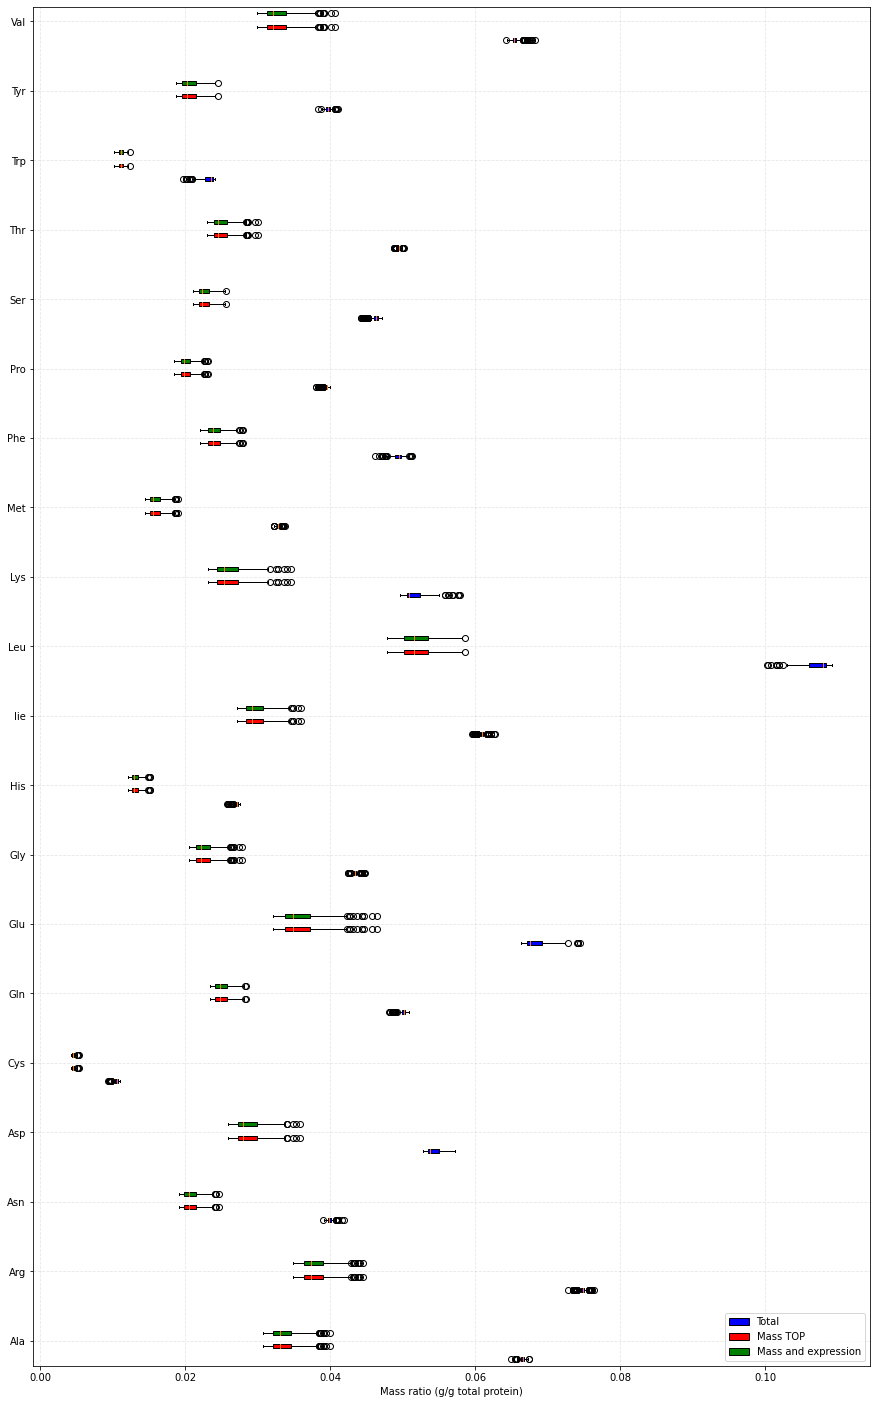

In [138]:
twoamino_use_data={}
for eachamino in list(ori_pro.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(ori_pro[eachamino]))
    twoamino_use_data[eachamino].append(list(top_pro[eachamino]))
    twoamino_use_data[eachamino].append(list(exp_pro[eachamino]))

data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ['Total','Mass TOP','Mass and expression']
colors = ['blue', 'red', 'green']
ori_list=[1,2,3]
fold=3.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list#np.linspace(1,np.max(list(np.add(ori_list,28.5*fold))),20)
x_position_fmt=list(ori_pro.columns)
ylabel='Mass ratio (g/g total protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_topandexp%s.png'%strain
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,25)

# 大肠杆菌其他几个菌株比较

## mass ratio in different protein

In [49]:
strain1='BW25113_pro'
strain2='BW25113'
strain3='DH1'
strain4='MG1655'
strain5='W3110'
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain1
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino1=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain2
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino2=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain3
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino3=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain4
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino4=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain5
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino5=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)

twoamino_use_data={}
for eachamino in list(twoamino1.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(twoamino1[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino2[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino3[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino4[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino5[eachamino]))
    

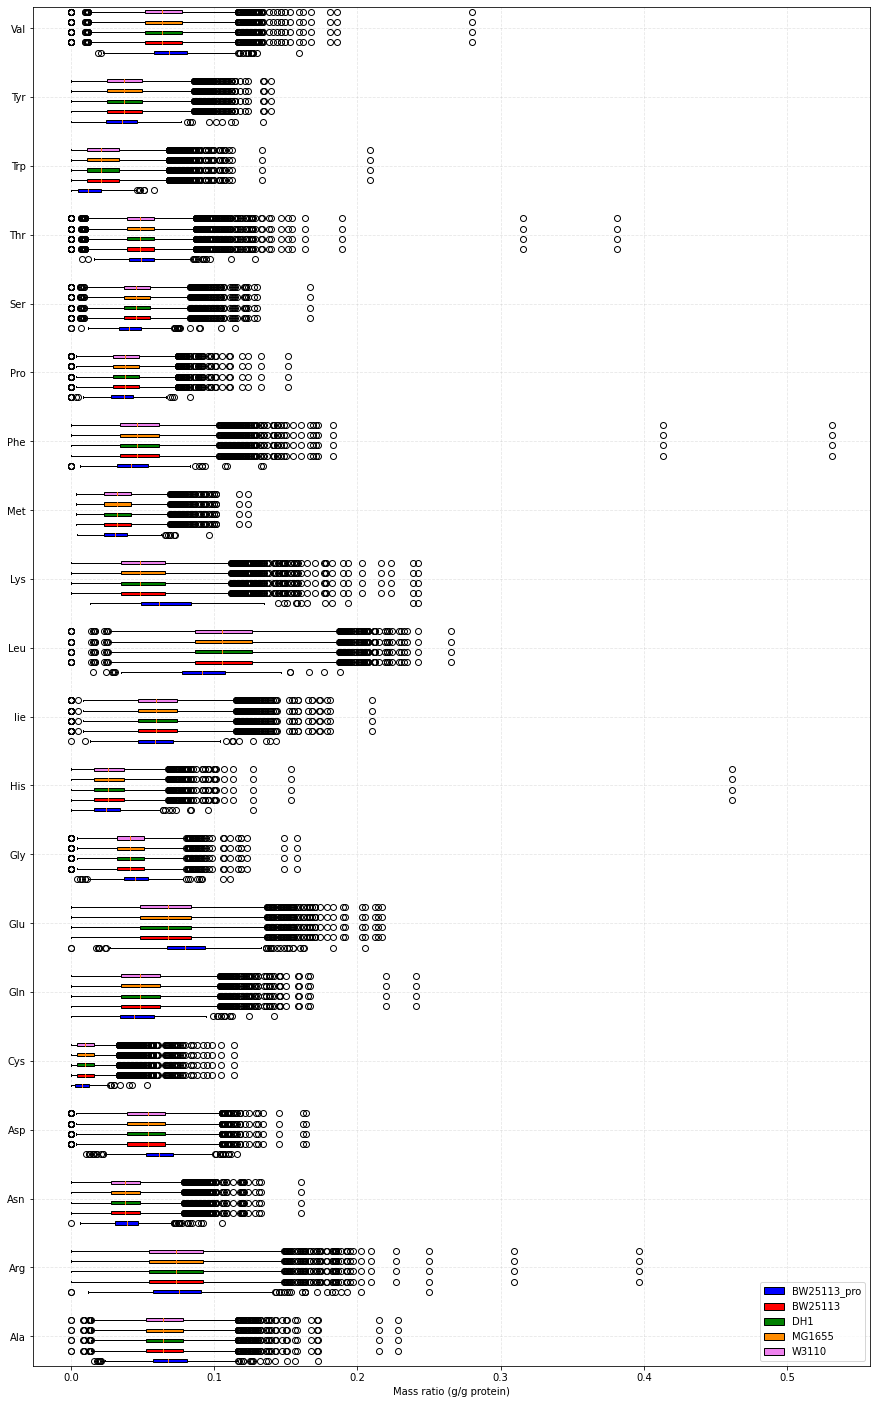

In [50]:
data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ["BW25113_pro", "BW25113", "DH1",'MG1655','W3110']
colors = ['blue', 'red', 'green','darkorange','violet']
ori_list=[1,2,3,4,5]
fold=4.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list#np.linspace(1,np.max(list(np.add(ori_list,28.5*fold))),20)
x_position_fmt=list(twoamino1.columns)
ylabel='Mass ratio (g/g protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_g_g_ecoli.png'
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,25)

## total mass ratio

In [51]:
strain1='BW25113_pro'
strain2='BW25113'
strain3='DH1'
strain4='MG1655'
strain5='W3110'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain1
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino1=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain2
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino2=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain3
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino3=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain4
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino4=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain5
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino5=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

twoamino_use_data={}
for eachamino in list(twoamino1.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(twoamino1[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino2[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino3[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino4[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino5[eachamino]))
    

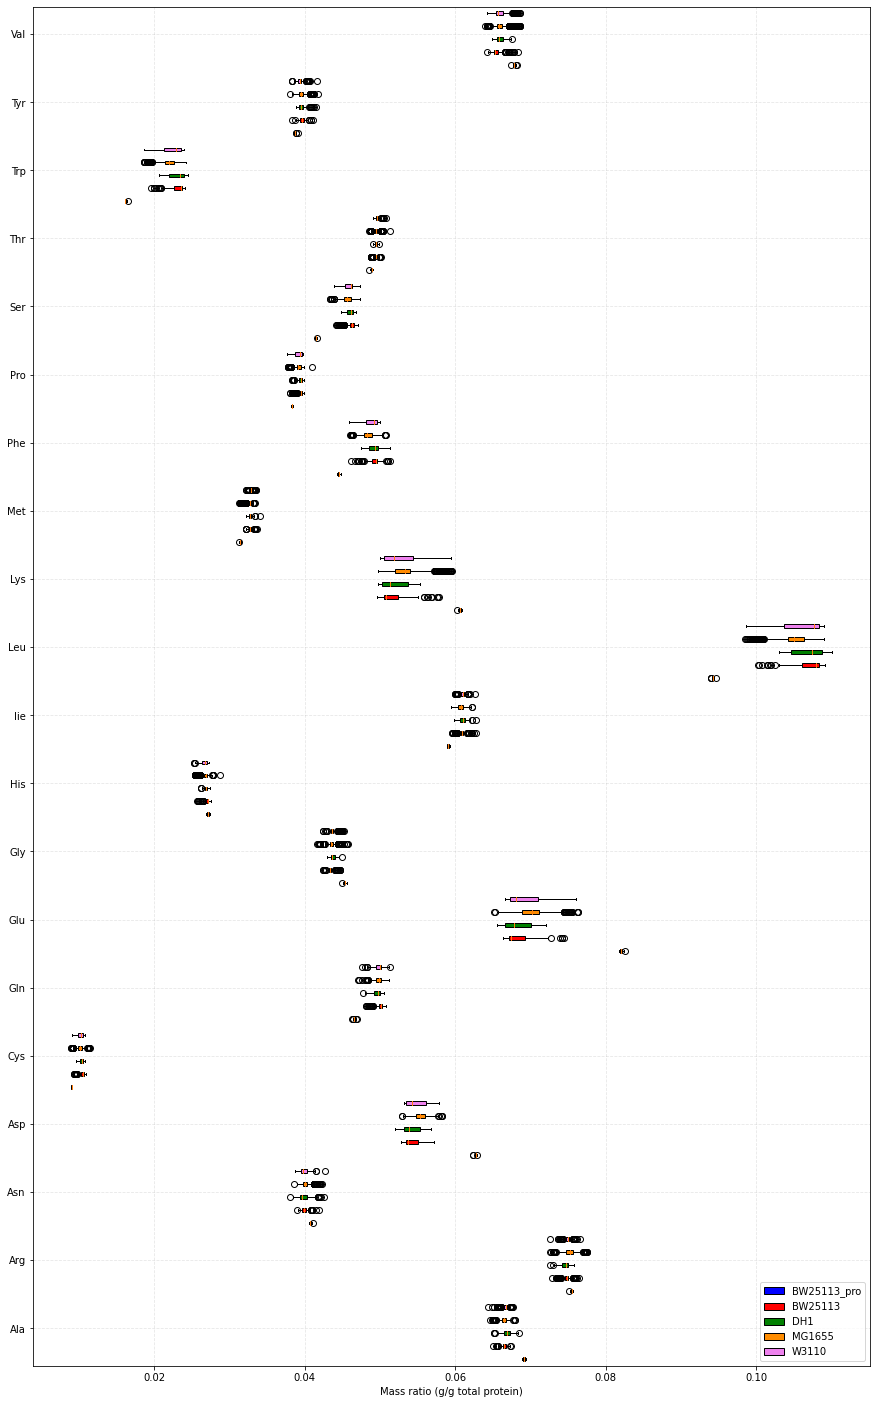

In [52]:
data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ["BW25113_pro", "BW25113", "DH1",'MG1655','W3110']
colors = ['blue', 'red', 'green','darkorange','violet']
ori_list=[1,2,3,4,5]
fold=3.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list#np.linspace(1,np.max(list(np.add(ori_list,28.5*fold))),20)
x_position_fmt=list(twoamino1.columns)
ylabel='Mass ratio (g/g total protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison.png'
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,25)

## 均值比较 

In [53]:
# strain1='BW25113_pro'
strain2='BW25113'
strain3='DH1'
strain4='MG1655'
strain5='W3110'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain1
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino1=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
twoamino1_mean=np.mean(twoamino1)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain2
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino2=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
twoamino2_mean=np.mean(twoamino2)  

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain3
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino3=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
twoamino3_mean=np.mean(twoamino3)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain4
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino4=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
twoamino4_mean=np.mean(twoamino4)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain5
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino5=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
twoamino5_mean=np.mean(twoamino5)

pro_mean=pd.concat([twoamino1_mean,twoamino2_mean,twoamino3_mean,twoamino4_mean,twoamino5_mean],axis=1)
pro_mean.columns=['BW25113_pro','BW25113','DH1','MG1655','W3110']
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)
    

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  retur

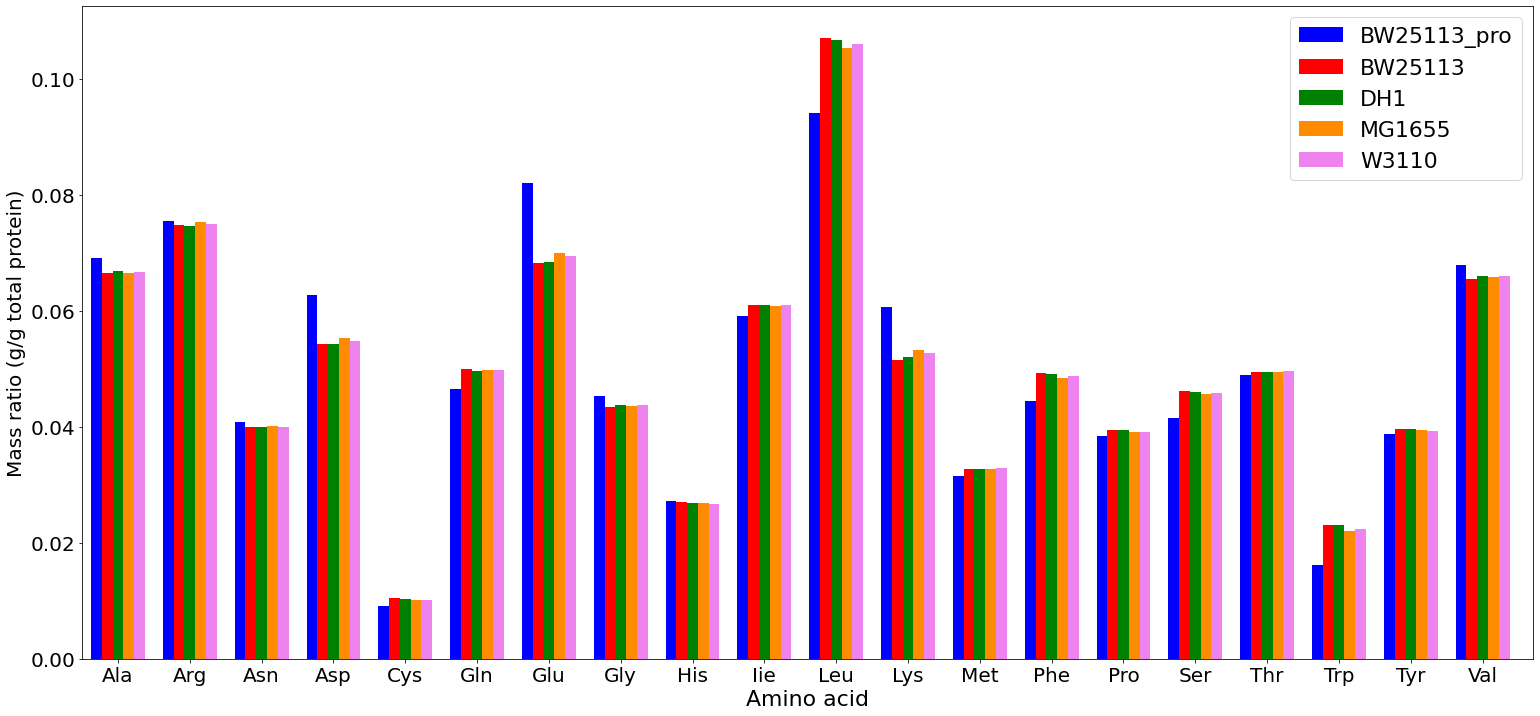

In [54]:
import  matplotlib.pyplot   as plt
pngname='../analysis_result/article_figures/protein_amino_acid_composition_mean_ecoli.png'
plt.figure(figsize=(26, 12)) 
plt.tick_params(labelsize=20)
#pro_mean.plot.bar(figsize=(25, 10))
ind = np.arange(20)                # the x locations for the groups
plt.xlim(-.2, 20)
width = 0.15  
#plt.rcParams['font.style'] ='italic' # 'normal'#
plt.bar(ind,pro_mean['BW25113_pro'],width,color = 'blue',label = 'BW25113_pro')  
plt.bar(ind+width,pro_mean['BW25113'],width,color = 'red',label = 'BW25113') # ind+width adjusts the left start location of the bar.
plt.bar(ind+2*width,pro_mean['DH1'],width,color = 'green',label = 'DH1')
plt.bar(ind+3*width,pro_mean['MG1655'],width,color = 'darkorange',label = 'MG1655')
plt.bar(ind+4*width,pro_mean['W3110'],width,color = 'violet',label = 'W3110')

plt.xticks(np.arange(20) + 2*width, list(pro_mean.index),rotation=0)
#plt.bar(data=pro_mean)
#sns.barplot(data=pro_mean.T)
plt.ylabel("Mass ratio (g/g total protein)",fontsize=20)
plt.xlabel("Amino acid", fontsize=22)  # 我们设置横纵坐标的标题。
plt.legend(loc="upper right", fontsize=22)
plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.xticks(rotation=0)
plt.show()
#plt.rcParams['font.style'] ='normal' # 'normal'#

## STD和偏离比例

In [55]:
print(strain3)
amino_list=twoamino3.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino3[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

DH1


,mean,sd,sd/mean
Ala,0.066899,0.000658,0.009832
Arg,0.074608,0.000610,0.008175
Asn,0.039935,0.000842,0.021087
Asp,0.054248,0.001262,0.023258
Cys,0.010381,0.000260,0.025039
Gln,0.049655,0.000563,0.011338
Glu,0.068373,0.001868,0.027317
Gly,0.043737,0.000396,0.009063
His,0.026923,0.000241,0.008953
Iie,0.061040,0.000541,0.008871


In [56]:
print(strain4)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino4[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

MG1655


,mean,sd,sd/mean
Ala,0.066533,0.000395,0.005943
Arg,0.075305,0.000735,0.009766
Asn,0.040104,0.000462,0.011515
Asp,0.055257,0.001039,0.018809
Cys,0.010180,0.000343,0.033712
Gln,0.049857,0.000522,0.010467
Glu,0.070025,0.001785,0.025489
Gly,0.043582,0.000396,0.009092
His,0.026851,0.000350,0.013034
Iie,0.060766,0.000448,0.007373


In [57]:
print(strain5)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino5[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

W3110


,mean,sd,sd/mean
Ala,0.066672,0.000384,0.005752
Arg,0.074959,0.000403,0.005376
Asn,0.039946,0.000572,0.014309
Asp,0.054794,0.001420,0.025919
Cys,0.010226,0.000430,0.042056
Gln,0.049761,0.000614,0.012341
Glu,0.069437,0.002427,0.034957
Gly,0.043725,0.000426,0.009745
His,0.026671,0.000477,0.017871
Iie,0.061000,0.000346,0.005667


# 其他物种比较

## 氨基酸组成

In [58]:
strain1='Pseudomonas'
strain2='Corynebacterium_RNA_seq'
strain3='BW25113'
strain4='Bacillus'
strain5='Yeast_single_cell'

seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain1
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino1=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain2
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino2=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain3
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino3=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain4
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino4=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)
    
seq_amino_composition_MW_norm_file='../analysis_result/seq_amino_composition_g_g_norm_%s.csv'%strain5
seq_amino_composition_MW_norm_df=pd.read_csv(seq_amino_composition_MW_norm_file,index_col=0)
twoamino5=seq_amino_composition_MW_norm_df.sort_index(axis = 1,ascending = True)

twoamino_use_data={}
for eachamino in list(twoamino1.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(twoamino1[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino2[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino3[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino4[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino5[eachamino]))
    

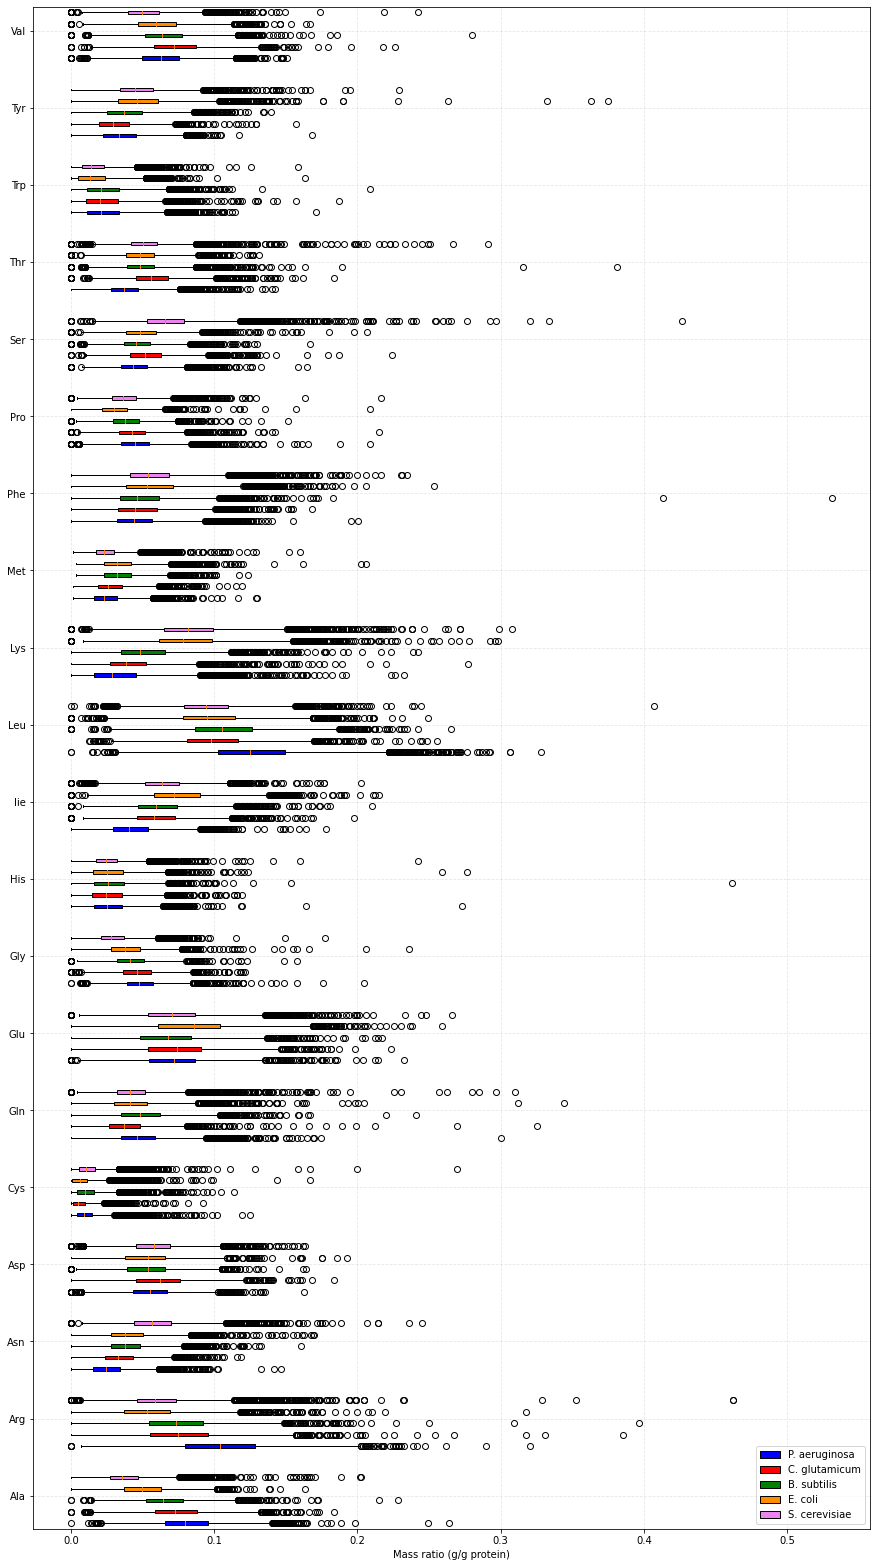

In [59]:
data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ["P. aeruginosa",'C. glutamicum',"B. subtilis",'E. coli', "S. cerevisiae"]
colors = ['blue', 'red', 'green','darkorange','violet']
fold=4.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list
x_position_fmt=list(twoamino1.columns)
ylabel='Mass ratio (g/g protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_g_g_otherspecies.png'
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,28)

## total mass ratio

In [60]:
strain1='Pseudomonas'
strain2='Corynebacterium_RNA_seq'
strain3='BW25113'
strain4='Bacillus'
strain5='Yeast_single_cell'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain1
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino1=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain2
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino2=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain3
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino3=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain4
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino4=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain5
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino5=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

twoamino_use_data={}
for eachamino in list(twoamino1.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(twoamino1[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino2[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino3[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino4[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino5[eachamino]))    

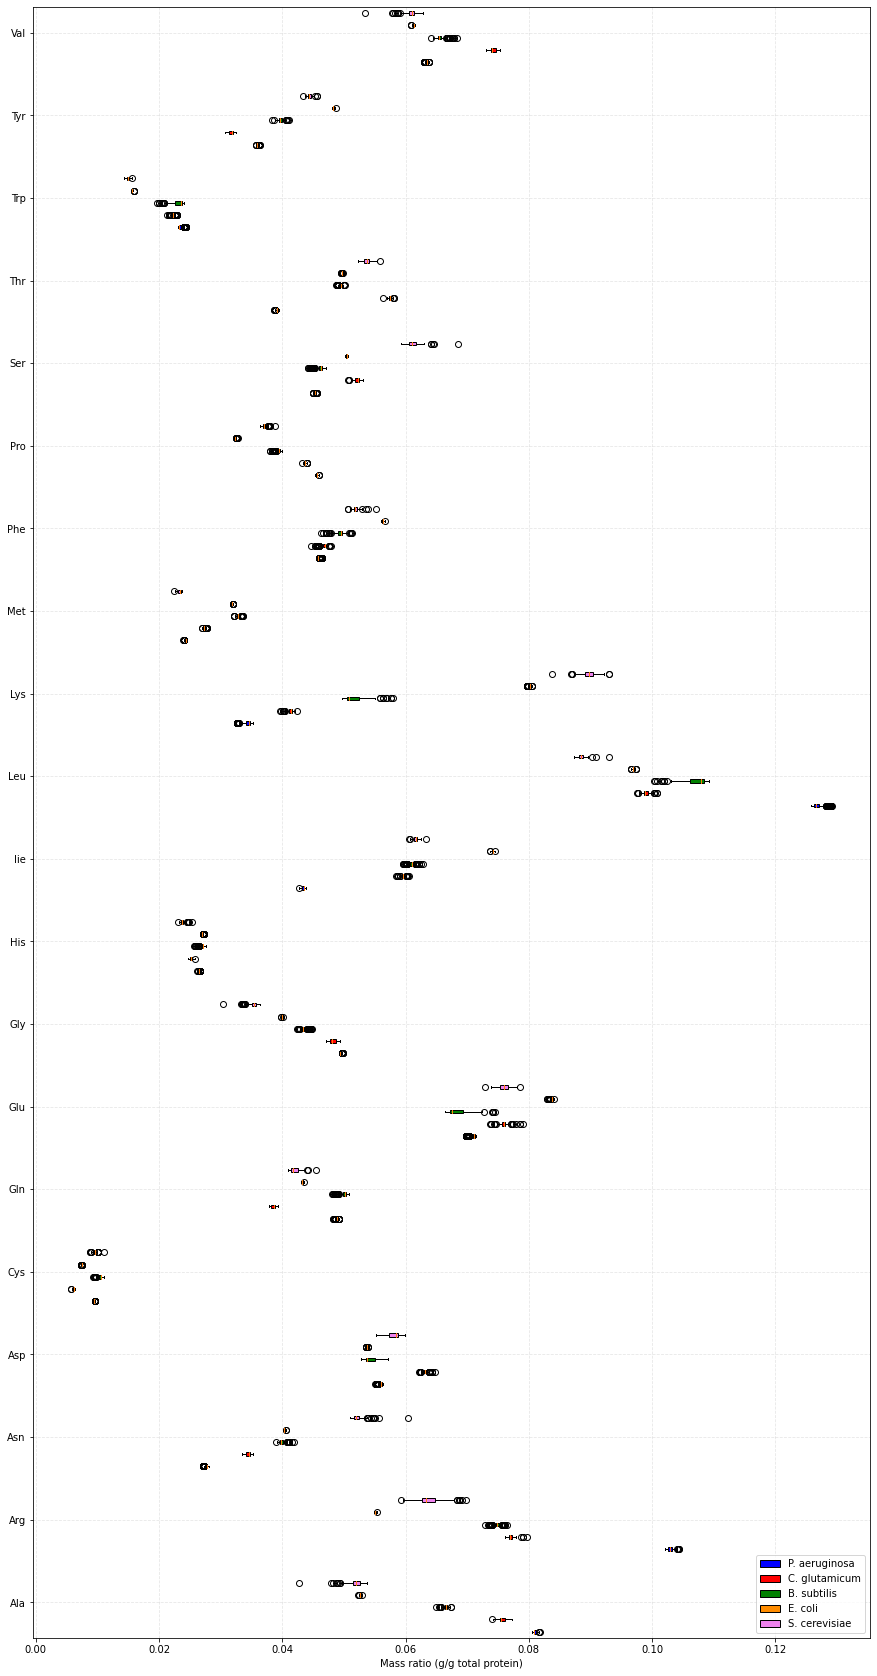

In [61]:
data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ["P. aeruginosa",'C. glutamicum',"B. subtilis",'E. coli', "S. cerevisiae"]
colors = ['blue', 'red', 'green','darkorange','violet']
fold=4.5
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list
x_position_fmt=list(twoamino1.columns)
ylabel='Mass ratio (g/g total protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_otherspecies.png'
draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,30)

## STD和偏离比较

In [62]:
print(strain1)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino1[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

Pseudomonas


,mean,sd,sd/mean
Ala,0.080967,0.000233,0.002881
Arg,0.102914,0.000405,0.003938
Asn,0.027738,0.000190,0.006844
Asp,0.056008,0.000244,0.004348
Cys,0.009426,0.000069,0.007357
Gln,0.048893,0.000169,0.003449
Glu,0.071014,0.000346,0.004879
Gly,0.049377,0.000132,0.002679
His,0.026434,0.000063,0.002393
Iie,0.043407,0.000227,0.005222


In [63]:
np.max(amino_mass_norm_stat_std['sd'])

0.00070207533761207

In [64]:
print(strain2)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino2[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

Corynebacterium_RNA_seq


,mean,sd,sd/mean
Ala,0.075723,0.000602,0.007948
Arg,0.077097,0.000411,0.005327
Asn,0.034439,0.000416,0.012089
Asp,0.063171,0.000353,0.005589
Cys,0.006148,0.000124,0.020170
Gln,0.038603,0.000360,0.009327
Glu,0.075925,0.000589,0.007753
Gly,0.048205,0.000457,0.009482
His,0.025257,0.000228,0.009013
Iie,0.059624,0.000233,0.003909


In [65]:
np.max(amino_mass_norm_stat_std['sd'])

0.0006018354142748664

In [66]:
print(strain3)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino3[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

BW25113


,mean,sd,sd/mean
Ala,0.066509,0.000310,0.004661
Arg,0.074858,0.000454,0.006061
Asn,0.039947,0.000357,0.008948
Asp,0.054292,0.000969,0.017853
Cys,0.010455,0.000283,0.027039
Gln,0.050011,0.000467,0.009338
Glu,0.068295,0.001598,0.023402
Gly,0.043443,0.000323,0.007430
His,0.027068,0.000260,0.009588
Iie,0.060936,0.000383,0.006289


In [67]:
np.max(amino_mass_norm_stat_std['sd'])

0.001661288708724077

In [68]:
print(strain4)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino4[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

Bacillus


,mean,sd,sd/mean
Ala,0.052665,0.000096,0.001819
Arg,0.055137,0.000084,0.001527
Asn,0.040313,0.000085,0.002113
Asp,0.053788,0.000071,0.001329
Cys,0.007440,0.000039,0.005279
Gln,0.043249,0.000092,0.002123
Glu,0.083764,0.000168,0.002005
Gly,0.039913,0.000073,0.001841
His,0.026952,0.000103,0.003810
Iie,0.074110,0.000151,0.002040


In [69]:
np.max(amino_mass_norm_stat_std['sd'])

0.00016798836991137144

In [70]:
print(strain5)
amino_list=twoamino1.columns.values.tolist()
amino_mass_norm_stat_std=pd.DataFrame()
            
for each_i in amino_list:
    data=twoamino5[each_i]
    amino_mass_norm_stat_std.loc[each_i,'mean']=np.mean(data)
    amino_mass_norm_stat_std.loc[each_i,'sd']=np.std(data)
    amino_mass_norm_stat_std.loc[each_i,'sd/mean']=np.std(data)/np.mean(data)
    
amino_mass_norm_stat_std

Yeast_single_cell


,mean,sd,sd/mean
Ala,0.051821,0.001225,0.023636
Arg,0.063851,0.001938,0.030351
Asn,0.052233,0.001002,0.019177
Asp,0.058022,0.001101,0.018971
Cys,0.009553,0.000262,0.027450
Gln,0.041963,0.000723,0.017233
Glu,0.075976,0.000931,0.012252
Gly,0.035251,0.000701,0.019889
His,0.023774,0.000309,0.013008
Iie,0.061636,0.000382,0.006192


In [71]:
np.max(amino_mass_norm_stat_std['sd'])

0.0019379228238124116

## 均值比较

In [72]:
strain1='Bacillus'
strain2='Pseudomonas'
strain3='Yeast_single_cell'
strain4='Corynebacterium_RNA_seq'
strain5='BW25113'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain1
bc_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
bc_pro=bc_pro.sort_index(axis = 1,ascending = True)
bc_pro_mean=np.mean(bc_pro)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain2
Pseudomonas_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
Pseudomonas_pro=Pseudomonas_pro.sort_index(axis = 1,ascending = True)
Pseudomonas_pro_mean=np.mean(Pseudomonas_pro) 

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain3
yeast_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
yeast_pro=yeast_pro.sort_index(axis = 1,ascending = True)
yeast_pro_mean=np.mean(yeast_pro)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain4
Corynebacterium_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
Corynebacterium_pro=Corynebacterium_pro.sort_index(axis = 1,ascending = True)
Corynebacterium_pro_mean=np.mean(Corynebacterium_pro) 

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain5
ecoli_pro=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
ecoli_pro=ecoli_pro.sort_index(axis = 1,ascending = True)
ecoli_pro_mean=np.mean(ecoli_pro)

pro_mean=pd.concat([Pseudomonas_pro_mean,Corynebacterium_pro_mean,bc_pro_mean,ecoli_pro_mean,yeast_pro_mean],axis=1)
pro_mean.columns=['Pseudomonas','Corynebacterium','Bacillus','Ecoli','Yeast']
pro_mean.name='Amino'
pro_mean=pro_mean.sort_index(axis = 0,ascending = True)    

/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/maozt/anaconda3/envs/AC_composition/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  retur

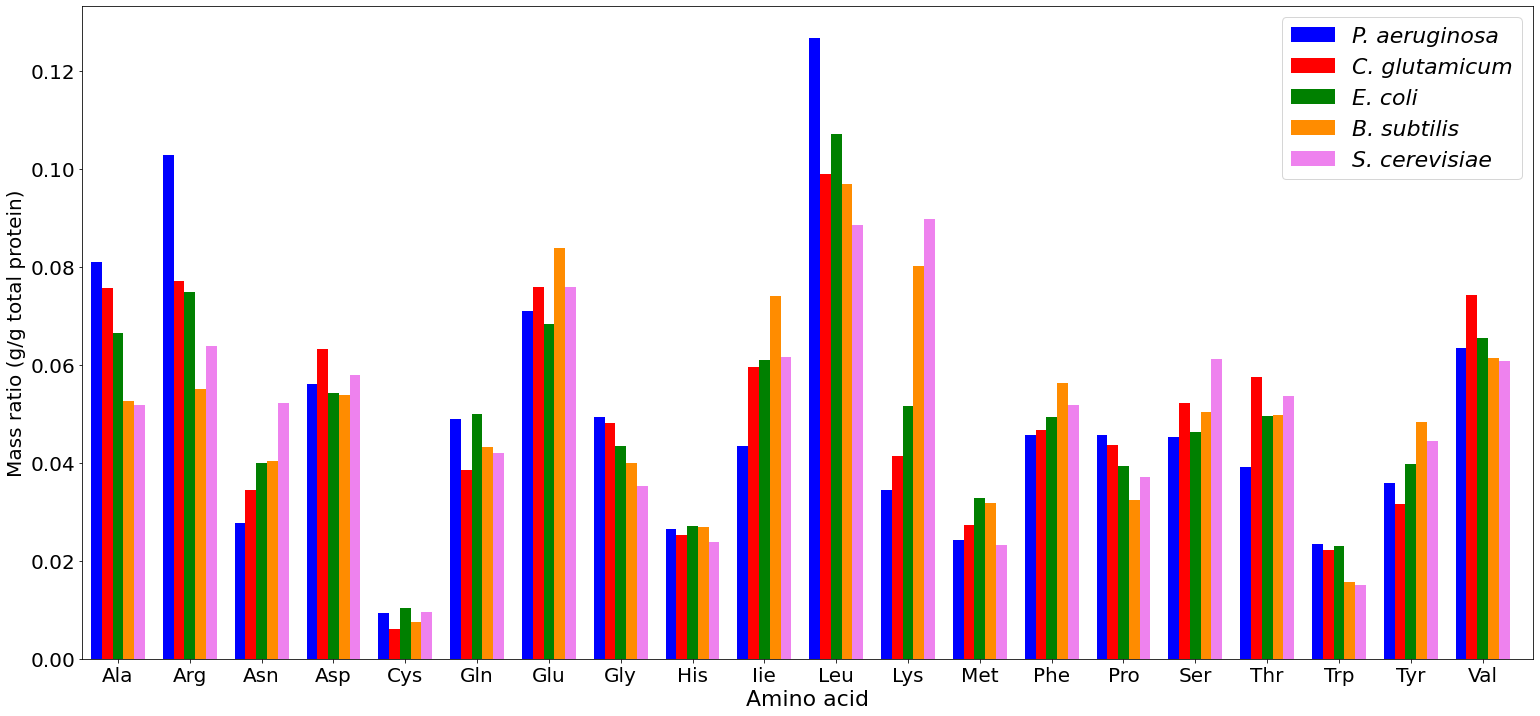

In [73]:
import  matplotlib.pyplot   as plt
pngname='../analysis_result/article_figures/protein_amino_acid_composition_mean.png'
plt.figure(figsize=(26, 12)) 
plt.tick_params(labelsize=20)
#pro_mean.plot.bar(figsize=(25, 10))
ind = np.arange(20)                # the x locations for the groups
plt.xlim(-.2, 20)
width = 0.15
plt.rcParams['font.style'] ='italic' # 'normal'#
plt.bar(ind,pro_mean['Pseudomonas'],width,color = 'blue',label = 'P. aeruginosa')  
plt.bar(ind+width,pro_mean['Corynebacterium'],width,color = 'red',label = 'C. glutamicum') # ind+width adjusts the left start location of the bar.
plt.bar(ind+2*width,pro_mean['Ecoli'],width,color = 'green',label = 'E. coli')
plt.bar(ind+3*width,pro_mean['Bacillus'],width,color = 'darkorange',label = 'B. subtilis')
plt.bar(ind+4*width,pro_mean['Yeast'],width,color = 'violet',label = 'S. cerevisiae')

# plt.bar(ind,pro_mean['Ecoli'],width,color = 'blue',label = 'E. coli')  
# plt.bar(ind+width,pro_mean['Bacillus'],width,color = 'red',label = 'B. subtilis') # ind+width adjusts the left start location of the bar.
# plt.bar(ind+2*width,pro_mean['Yeast'],width,color = 'green',label = 'S. cerevisiae ')
# plt.bar(ind+3*width,pro_mean['Pseudomonas'],width,color = 'darkorange',label = 'P. aeruginosa')
# plt.bar(ind+4*width,pro_mean['Corynebacterium'],width,color = 'violet',label = 'C. glutamicum')

plt.xticks(np.arange(20) + 2*width, list(pro_mean.index),rotation=0)
#plt.bar(data=pro_mean)
#sns.barplot(data=pro_mean.T)
plt.ylabel("Mass ratio (g/g total protein)",fontsize=20)
plt.xlabel("Amino acid", fontsize=22)  # 我们设置横纵坐标的标题。
plt.legend(loc="upper right", fontsize=22)
plt.savefig(pngname,dpi =300,bbox_inches='tight')
plt.xticks(rotation=0)
plt.show()
plt.rcParams['font.style'] ='normal' # 'normal'#

In [74]:
from scipy import stats
species_list=['Ecoli','Bacillus','Yeast','Pseudomonas','Corynebacterium']
mw_stat=pd.DataFrame()
for each_i in range(len(species_list)-1):
    for each_j in range(each_i,len(species_list)):
        if (each_i!=each_j):
            amino_vs=species_list[each_i]+'_'+species_list[each_j]
            mw_stat.loc[amino_vs,'corr']=stats.pearsonr(pro_mean[species_list[each_i]],pro_mean[species_list[each_j]])[0]
mw_stat=mw_stat.sort_values(by='corr',ascending = False)
mw_stat

,corr
Ecoli_Corynebacterium,0.955032
Bacillus_Yeast,0.950879
Ecoli_Pseudomonas,0.935103
Pseudomonas_Corynebacterium,0.916719
Ecoli_Bacillus,0.875584
Ecoli_Yeast,0.831599
Bacillus_Corynebacterium,0.805309
Yeast_Corynebacterium,0.775901
Bacillus_Pseudomonas,0.684777
Yeast_Pseudomonas,0.653841


In [75]:
#strain='BW25113'#344, 4080
#strain='BW25113_pro'#25, 582
#strain='DH1'#103, 4080
#strain='MG1655'#2307, 4080
#strain='W3110'#280, 4080
strain='Pseudomonas'#950, 5460
#strain='Corynebacterium_RNA_seq'#292, 3081
#strain='Bacillus'#269, 4160
#strain='Yeast_single_cell'#175, 5612
protein_expression_mass_norm_outfile='../analysis_result/%s_exp_onecell.json'%strain
protein_expression_mass_norm=json_load(protein_expression_mass_norm_outfile) 
protein_expression_mass_norm_df=pd.DataFrame(protein_expression_mass_norm).T
protein_expression_mass_norm_df.shape

(950, 5460)